## Business Problem:
### A FMCG company has entered into the instant noodles business two years back. Their higher management has notices that there is a miss match in the demand and supply. Where the demand is high, supply is pretty low and where the demand is low, supply is pretty high. In both the ways it is an inventory cost loss to the company; hence, the higher management wants to optimize the supply quantity in each and every warehouse in entire country.

## Goal & Objective:
### The objective of this exercise is to build a model, using historical data that will determine an optimum weight of the product to be shipped each time to the warehouse.
### Also try to analysis the demand pattern in different pockets of the country so management can drive the advertisement campaign particular in those pockets.¶

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics
from scipy.stats import norm 
import warnings
warnings.filterwarnings("ignore")

## Load Dataset

In [2]:
data=pd.read_csv('Data.csv')

In [3]:
data.head(10)

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0     WH_100000     EID_50000         Urban            Small   West   
1     WH_100001     EID_50001         Rural            Large  North   
2     WH_100002     EID_50002         Rural              Mid  South   
3     WH_100003     EID_50003         Rural              Mid  North   
4     WH_100004     EID_50004         Rural            Large  North   
5     WH_100005     EID_50005         Rural            Small   West   
6     WH_100006     EID_50006         Rural            Large   West   
7     WH_100007     EID_50007         Rural            Large  North   
8     WH_100008     EID_50008         Rural            Small  South   
9     WH_100009     EID_50009         Rural            Small  South   

  WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0           Zone 6                   3                    1   
1           Zone 5                   0                    0   
2           Zone 2                   1                    0   
3           Zone 3                   7                    4   
4           Zone 5                   3                    1   
5           Zone 1                   8                    0   
6           Zone 6                   8                    0   
7           Zone 5                   1                    0   
8           Zone 6                   8                    1   
9           Zone 6                   4                    3   

   Competitor_in_mkt  retail_shop_num  ... electric_supply  dist_from_hub  \
0                  2             4651  ...               1             91   
1                  4             6217  ...               1            210   
2                  4             4306  ...               0            161   
3                  2             6000  ...               0            103   
4                  2             4740  ...               1            112   
5                  2             5053  ...               1            152   
6                  4             4449  ...               1             77   
7                  4             7183  ...               0            241   
8                  4             5381  ...               1            124   
9                  3             3869  ...               0             78   

   workers_num  wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0         29.0          NaN                          13              0   
1         31.0          NaN                           4              0   
2         37.0          NaN                          17              0   
3         21.0          NaN                          17              1   
4         25.0       2009.0                          18              0   
5         35.0       2009.0                          23              1   
6         27.0       2010.0                          24              0   
7         23.0          NaN                          18              0   
8         22.0       2013.0                          13              1   
9         43.0          NaN                           6              0   

   approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                             A                 5              15   
1                             A                 3              17   
2                             A                 6              22   
3                            A+                 3              27   
4                             C                 6              24   
5                            A+                 3               3   
6                             B                 3               6   
7                             C                 6              24   
8                            A+                 5               2   
9                             C                 6               2   

   product_wg_ton  
0           17115  
1            5074  
2           23137  
3           22115  
4  

In [4]:
data.tail(10)

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
24990     WH_124990     EID_74990         Rural            Small  South   
24991     WH_124991     EID_74991         Rural              Mid   West   
24992     WH_124992     EID_74992         Rural            Large   West   
24993     WH_124993     EID_74993         Rural              Mid  South   
24994     WH_124994     EID_74994         Rural              Mid  North   
24995     WH_124995     EID_74995         Rural            Small  North   
24996     WH_124996     EID_74996         Rural              Mid   West   
24997     WH_124997     EID_74997         Urban            Large  South   
24998     WH_124998     EID_74998         Rural            Small  North   
24999     WH_124999     EID_74999         Rural              Mid   West   

      WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
24990           Zone 1                   3                    0   
24991           Zone 4                   4                    0   
24992           Zone 5                   3                    0   
24993           Zone 3                   5                    0   
24994           Zone 4                   7                    0   
24995           Zone 1                   3                    0   
24996           Zone 2                   6                    0   
24997           Zone 5                   7                    0   
24998           Zone 1                   1                    0   
24999           Zone 4                   8                    2   

       Competitor_in_mkt  retail_shop_num  ... electric_supply  dist_from_hub  \
24990                  3             4124  ...               0             98   
24991                  4             3672  ...               0            183   
24992                  2             4312  ...               0            190   
24993                  2             4591  ...               1            163   
24994                  3             5242  ...               0             71   
24995                  4             5390  ...               1            142   
24996                  4             4490  ...               1            130   
24997                  2             5403  ...               1            147   
24998                  2            10562  ...               1             60   
24999                  4             5664  ...               1            239   

       workers_num  wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
24990         27.0          NaN                          26              1   
24991         26.0       2006.0                          28              1   
24992         20.0       2007.0                          17              0   
24993         33.0       2000.0                          22              0   
24994         25.0       2016.0                           9              0   
24995         34.0       2005.0                          22              1   
24996         28.0       2012.0                          10              0   
24997          NaN          NaN                          23              0   
24998         25.0          NaN                          18              0   
24999         39.0       2019.0                           4              0   

       approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
24990                            A+                 3              21   
24991                             C                 6              26   
24992                             A                 4              10   
24993                            B+                 5              19   
24994                             B                 1              26   
24995                             A                 2              30   
24996                             B                 4              18   
24997                            B+                 5              25   
24998                             

In [5]:
data.shape

(25000, 24)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [7]:
data.isna().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [8]:
data.drop(['Ware_house_ID','WH_Manager_ID'],axis=1,inplace=True)

In [9]:
data.duplicated().sum()

0

In [10]:
data.describe()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
count        25000.000000         25000.000000       25000.000000   
mean             4.089040             0.773680           3.104200   
std              2.606612             1.199449           1.141663   
min              0.000000             0.000000           0.000000   
25%              2.000000             0.000000           2.000000   
50%              4.000000             0.000000           3.000000   
75%              6.000000             1.000000           4.000000   
max              8.000000             5.000000          12.000000   

       retail_shop_num  distributor_num  flood_impacted   flood_proof  \
count     25000.000000     25000.000000    25000.000000  25000.000000   
mean       4985.711560        42.418120        0.098160      0.054640   
std        1052.825252        16.064329        0.297537      0.227281   
min        1821.000000        15.000000        0.000000      0.000000   
25%        4313.000000        29.000000        0.000000      0.000000   
50%        4859.000000        42.000000        0.000000      0.000000   
75%        5500.000000        56.000000        0.000000      0.000000   
max       11008.000000        70.000000        1.000000      1.000000   

       electric_supply  dist_from_hub   workers_num   wh_est_year  \
count     25000.000000   25000.000000  24010.000000  13119.000000   
mean          0.656880     163.537320     28.944398   2009.383185   
std           0.474761      62.718609      7.872534      7.528230   
min           0.000000      55.000000     10.000000   1996.000000   
25%           0.000000     109.000000     24.000000   2003.000000   
50%           1.000000     164.000000     28.000000   2009.000000   
75%           1.000000     218.000000     33.000000   2016.000000   
max           1.000000     271.000000     98.000000   2023.000000   

       storage_issue_reported_l3m  temp_reg_mach  wh_breakdown_l3m  \
count                25000.000000   25000.000000      25000.000000   
mean                    17.130440       0.303280          3.482040   
std                      9.161108       0.459684          1.690335   
min                      0.000000       0.000000          0.000000   
25%                     10.000000       0.000000          2.000000   
50%                     18.000000       0.000000          3.000000   
75%                     24.000000       1.000000          5.000000   
max                     39.000000       1.000000          6.000000   

       govt_check_l3m  product_wg_ton  
count    25000.000000    25000.000000  
mean        18.812280    22102.632920  
std          8.632382    11607.755077  
min          1.000000     2065.000000  
25%         11.000000    13059.000000  
50%         21.000000    22101.000000  
75%         26.000000    30103.000000  
max         32.000000    55151.000000

### Check for missing values

In [11]:
data.isnull().sum()[data.isnull().sum().values > 0].sort_values(ascending=False)

wh_est_year                     11881
workers_num                       990
approved_wh_govt_certificate      908
dtype: int64

### Missing value Imputation

In [12]:
data['workers_num']=data['workers_num'].replace(np.NaN,data['workers_num'].median())

In [13]:
data['approved_wh_govt_certificate'].unique()

array(['A', 'A+', 'C', 'B', 'B+', nan], dtype=object)

In [14]:
data['approved_wh_govt_certificate'].value_counts()

C     5501
B+    4917
B     4812
A     4671
A+    4191
Name: approved_wh_govt_certificate, dtype: int64

In [15]:
data['approved_wh_govt_certificate']=data['approved_wh_govt_certificate'].replace(np.NaN,'application pending')

In [16]:
data.isnull().sum()[data.isnull().sum().values > 0].sort_values(ascending=False)

wh_est_year    11881
dtype: int64

In [17]:
sns.set()
sns.set_palette(palette='deep')

In [18]:
data.isnull().sum().sum()

11881

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 25000 non-null  object 
 1   WH_capacity_size              25000 non-null  object 
 2   zone                          25000 non-null  object 
 3   WH_regional_zone              25000 non-null  object 
 4   num_refill_req_l3m            25000 non-null  int64  
 5   transport_issue_l1y           25000 non-null  int64  
 6   Competitor_in_mkt             25000 non-null  int64  
 7   retail_shop_num               25000 non-null  int64  
 8   wh_owner_type                 25000 non-null  object 
 9   distributor_num               25000 non-null  int64  
 10  flood_impacted                25000 non-null  int64  
 11  flood_proof                   25000 non-null  int64  
 12  electric_supply               25000 non-null  int64  
 13  d

In [20]:
data["Current_Year"] = 2023

In [21]:
data['wh_age_years']=data['Current_Year']-data['wh_est_year']

In [22]:
data['wh_age_years'].describe()

count    13119.000000
mean        13.616815
std          7.528230
min          0.000000
25%          7.000000
50%         14.000000
75%         20.000000
max         27.000000
Name: wh_age_years, dtype: float64

In [23]:
data=data.drop(['Current_Year','wh_est_year'],axis=1)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 25000 non-null  object 
 1   WH_capacity_size              25000 non-null  object 
 2   zone                          25000 non-null  object 
 3   WH_regional_zone              25000 non-null  object 
 4   num_refill_req_l3m            25000 non-null  int64  
 5   transport_issue_l1y           25000 non-null  int64  
 6   Competitor_in_mkt             25000 non-null  int64  
 7   retail_shop_num               25000 non-null  int64  
 8   wh_owner_type                 25000 non-null  object 
 9   distributor_num               25000 non-null  int64  
 10  flood_impacted                25000 non-null  int64  
 11  flood_proof                   25000 non-null  int64  
 12  electric_supply               25000 non-null  int64  
 13  d

### Split into Numerical and Categorial variables

In [25]:
num=[]
cat=[]
for i in data.columns:
    if data[i].dtype=='object':
        cat.append(i)
    else:
        num.append(i)
print(num)
print(cat)

['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m', 'product_wg_ton', 'wh_age_years']
['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone', 'wh_owner_type', 'approved_wh_govt_certificate']


In [26]:
data[num].describe().T

count          mean           std     min  \
num_refill_req_l3m          25000.0      4.089040      2.606612     0.0   
transport_issue_l1y         25000.0      0.773680      1.199449     0.0   
Competitor_in_mkt           25000.0      3.104200      1.141663     0.0   
retail_shop_num             25000.0   4985.711560   1052.825252  1821.0   
distributor_num             25000.0     42.418120     16.064329    15.0   
flood_impacted              25000.0      0.098160      0.297537     0.0   
flood_proof                 25000.0      0.054640      0.227281     0.0   
electric_supply             25000.0      0.656880      0.474761     0.0   
dist_from_hub               25000.0    163.537320     62.718609    55.0   
workers_num                 25000.0     28.907000      7.717275    10.0   
storage_issue_reported_l3m  25000.0     17.130440      9.161108     0.0   
temp_reg_mach               25000.0      0.303280      0.459684     0.0   
wh_breakdown_l3m            25000.0      3.482040      1.690335     0.0   
govt_check_l3m              25000.0     18.812280      8.632382     1.0   
product_wg_ton              25000.0  22102.632920  11607.755077  2065.0   
wh_age_years                13119.0     13.616815      7.528230     0.0   

                                25%      50%      75%      max  
num_refill_req_l3m              2.0      4.0      6.0      8.0  
transport_issue_l1y             0.0      0.0      1.0      5.0  
Competitor_in_mkt               2.0      3.0      4.0     12.0  
retail_shop_num              4313.0   4859.0   5500.0  11008.0  
distributor_num                29.0     42.0     56.0     70.0  
flood_impacted                  0.0      0.0      0.0      1.0  
flood_proof                     0.0      0.0      0.0      1.0  
electric_supply                 0.0      1.0      1.0      1.0  
dist_from_hub                 109.0    164.0    218.0    271.0  
workers_num                    24.0     28.0     33.0     98.0  
storage_issue_reported_l3m     10.0     18.0     24.0     39.0  
temp_reg_mach                   0.0      0.0      1.0      1.0  
wh_breakdown_l3m                2.0      3.0      5.0      6.0  
govt_check_l3m                 11.0     21.0     26.0     32.0  
product_wg_ton              13059.0  22101.0  30103.0  55151.0  
wh_age_years                    7.0     14.0     20.0     27.0

In [27]:
data[cat].describe()

Location_type WH_capacity_size   zone WH_regional_zone  wh_owner_type  \
count          25000            25000  25000            25000          25000   
unique             2                3      4                6              2   
top            Rural            Large  North           Zone 6  Company Owned   
freq           22957            10169  10278             8339          13578   

       approved_wh_govt_certificate  
count                         25000  
unique                            6  
top                               C  
freq                           5501

In [28]:
from sklearn.impute import KNNImputer
  

In [29]:
imputer = KNNImputer(n_neighbors=5)

In [30]:
from sklearn.impute import KNNImputer

In [31]:
data1= imputer.fit_transform(data[num])

In [32]:
data[num]=pd.DataFrame(data1,columns=[num])

In [33]:
data[num].describe()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
count        25000.000000         25000.000000       25000.000000   
mean             4.089040             0.773680           3.104200   
std              2.606612             1.199449           1.141663   
min              0.000000             0.000000           0.000000   
25%              2.000000             0.000000           2.000000   
50%              4.000000             0.000000           3.000000   
75%              6.000000             1.000000           4.000000   
max              8.000000             5.000000          12.000000   

       retail_shop_num  distributor_num  flood_impacted   flood_proof  \
count     25000.000000     25000.000000    25000.000000  25000.000000   
mean       4985.711560        42.418120        0.098160      0.054640   
std        1052.825252        16.064329        0.297537      0.227281   
min        1821.000000        15.000000        0.000000      0.000000   
25%        4313.000000        29.000000        0.000000      0.000000   
50%        4859.000000        42.000000        0.000000      0.000000   
75%        5500.000000        56.000000        0.000000      0.000000   
max       11008.000000        70.000000        1.000000      1.000000   

       electric_supply  dist_from_hub   workers_num  \
count     25000.000000   25000.000000  25000.000000   
mean          0.656880     163.537320     28.907000   
std           0.474761      62.718609      7.717275   
min           0.000000      55.000000     10.000000   
25%           0.000000     109.000000     24.000000   
50%           1.000000     164.000000     28.000000   
75%           1.000000     218.000000     33.000000   
max           1.000000     271.000000     98.000000   

       storage_issue_reported_l3m  temp_reg_mach  wh_breakdown_l3m  \
count                25000.000000   25000.000000      25000.000000   
mean                    17.130440       0.303280          3.482040   
std                      9.161108       0.459684          1.690335   
min                      0.000000       0.000000          0.000000   
25%                     10.000000       0.000000          2.000000   
50%                     18.000000       0.000000          3.000000   
75%                     24.000000       1.000000          5.000000   
max                     39.000000       1.000000          6.000000   

       govt_check_l3m  product_wg_ton  wh_age_years  
count    25000.000000    25000.000000  25000.000000  
mean        18.812280    22102.632920     12.660584  
std          8.632382    11607.755077      7.235689  
min          1.000000     2065.000000      0.000000  
25%         11.000000    13059.000000      6.200000  
50%         21.000000    22101.000000     12.800000  
75%         26.000000    30103.000000     19.000000  
max         32.000000    55151.000000     27.000000

In [34]:
data.isnull().sum().sum()

0

### Uni variate Analysis of Categorical Variables

In [35]:
data['Location_type'].value_counts()

Rural    22957
Urban     2043
Name: Location_type, dtype: int64

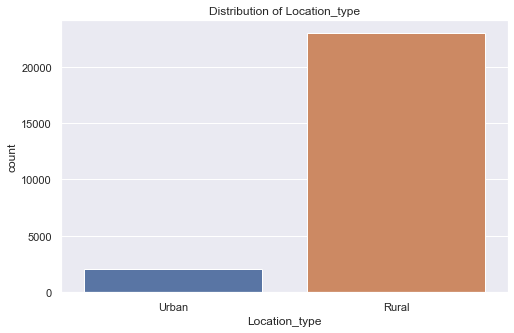

In [36]:
plt.figure(figsize=(8,5))
plt.title('Distribution of Location_type')
sns.countplot(data['Location_type']);

In [37]:
data['WH_capacity_size'].value_counts()

Large    10169
Mid      10020
Small     4811
Name: WH_capacity_size, dtype: int64

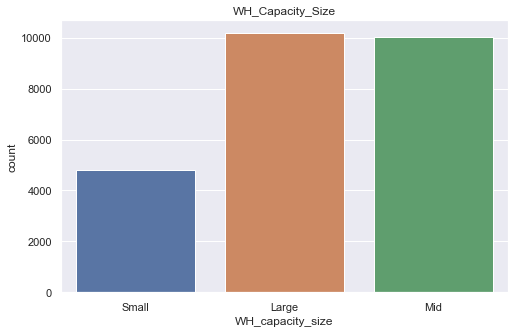

In [38]:
plt.figure(figsize=(8,5))
plt.title('WH_Capacity_Size')
sns.countplot(data['WH_capacity_size']);

In [39]:
data['zone'].value_counts()

North    10278
West      7931
South     6362
East       429
Name: zone, dtype: int64

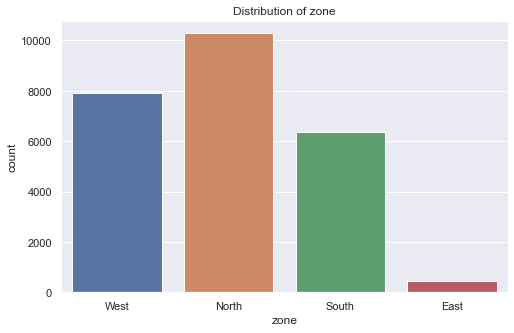

In [40]:
plt.figure(figsize=(8,5))
plt.title('Distribution of zone')
sns.countplot(data['zone']);

In [41]:
data['WH_regional_zone'].value_counts()

Zone 6    8339
Zone 5    4587
Zone 4    4176
Zone 2    2963
Zone 3    2881
Zone 1    2054
Name: WH_regional_zone, dtype: int64

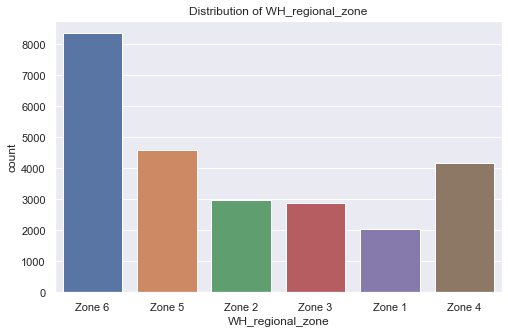

In [42]:
plt.figure(figsize=(8,5))
plt.title('Distribution of WH_regional_zone')
sns.countplot(data['WH_regional_zone']);

In [43]:
data['wh_owner_type'].value_counts()

Company Owned    13578
Rented           11422
Name: wh_owner_type, dtype: int64

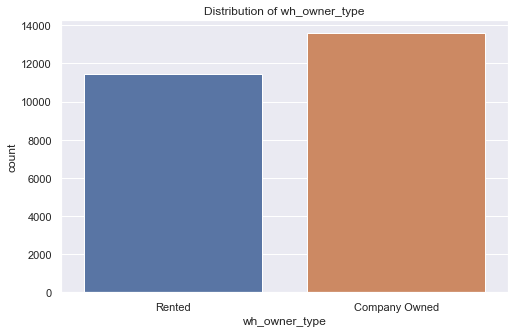

In [44]:
plt.figure(figsize=(8,5))
plt.title('Distribution of wh_owner_type')
sns.countplot(data['wh_owner_type']);

In [45]:
data['approved_wh_govt_certificate'].value_counts()

C                      5501
B+                     4917
B                      4812
A                      4671
A+                     4191
application pending     908
Name: approved_wh_govt_certificate, dtype: int64

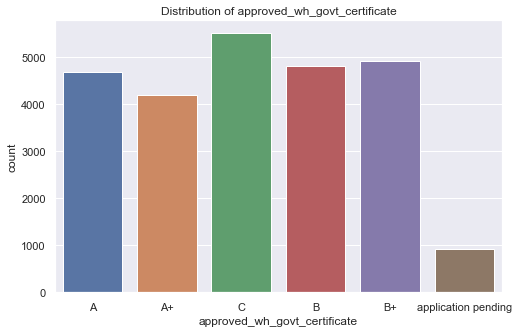

In [46]:
plt.figure(figsize=(8,5))
plt.title('Distribution of approved_wh_govt_certificate')
sns.countplot(data['approved_wh_govt_certificate']);

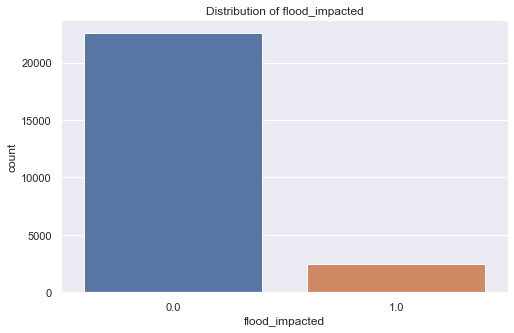

In [47]:
plt.figure(figsize=(8,5))
plt.title('Distribution of flood_impacted')
sns.countplot(data['flood_impacted']);

In [48]:
data['flood_impacted'].value_counts(normalize=True)

0.0    0.90184
1.0    0.09816
Name: flood_impacted, dtype: float64

In [49]:
data['flood_impacted'].value_counts()

0.0    22546
1.0     2454
Name: flood_impacted, dtype: int64

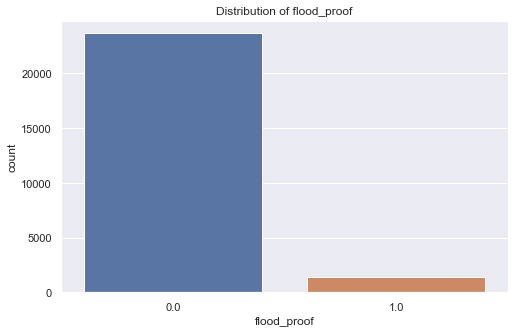

In [50]:
plt.figure(figsize=(8,5))
plt.title('Distribution of flood_proof')
sns.countplot(data['flood_proof']);

In [51]:
data['flood_proof'].value_counts()


0.0    23634
1.0     1366
Name: flood_proof, dtype: int64

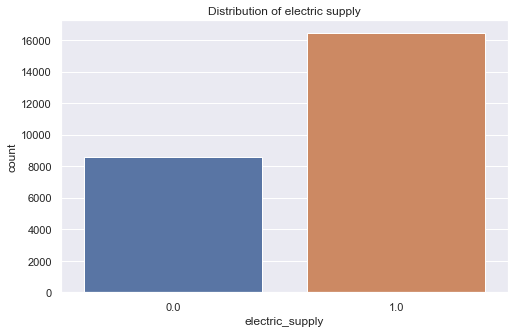

In [52]:
plt.figure(figsize=(8,5))
plt.title('Distribution of electric supply')
sns.countplot(data['electric_supply']);

In [53]:
data['electric_supply'].value_counts()

1.0    16422
0.0     8578
Name: electric_supply, dtype: int64

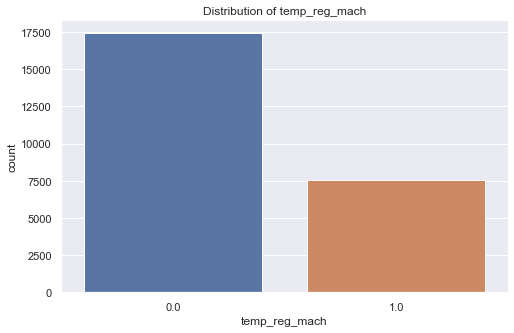

In [54]:
plt.figure(figsize=(8,5))
plt.title('Distribution of temp_reg_mach')
sns.countplot(data['temp_reg_mach']);

In [55]:
data['temp_reg_mach'].value_counts()

0.0    17418
1.0     7582
Name: temp_reg_mach, dtype: int64

### Univariate Analysis of Numerical Variables

In [56]:
data[num].columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton', 'wh_age_years'],
      dtype='object')

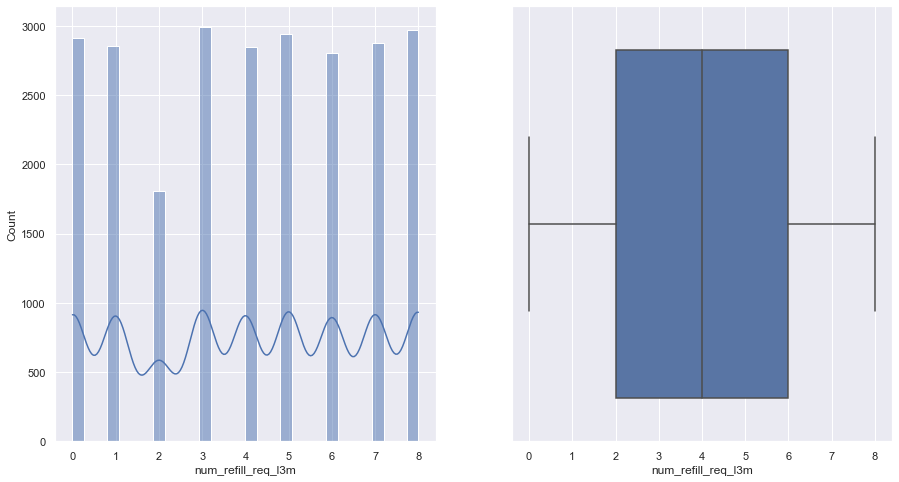

In [57]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,8)
sns.histplot(data['num_refill_req_l3m'], kde=True,ax=axes[0])
sns.boxplot(data['num_refill_req_l3m'],ax=axes[1]);

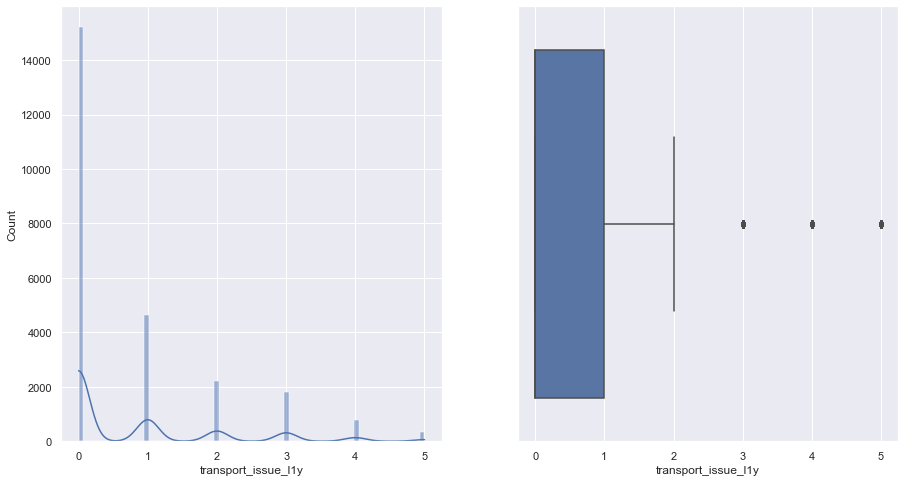

In [58]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,8)
sns.histplot(data['transport_issue_l1y'], kde=True,ax=axes[0])
sns.boxplot(data['transport_issue_l1y'],ax=axes[1]);

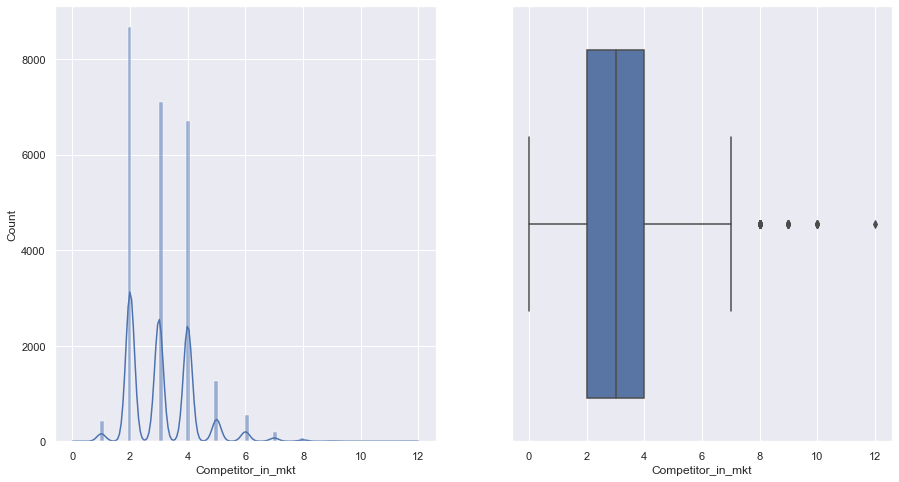

In [59]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,8)
sns.histplot(data['Competitor_in_mkt'], kde=True,ax=axes[0])
sns.boxplot(data['Competitor_in_mkt'],ax=axes[1]);

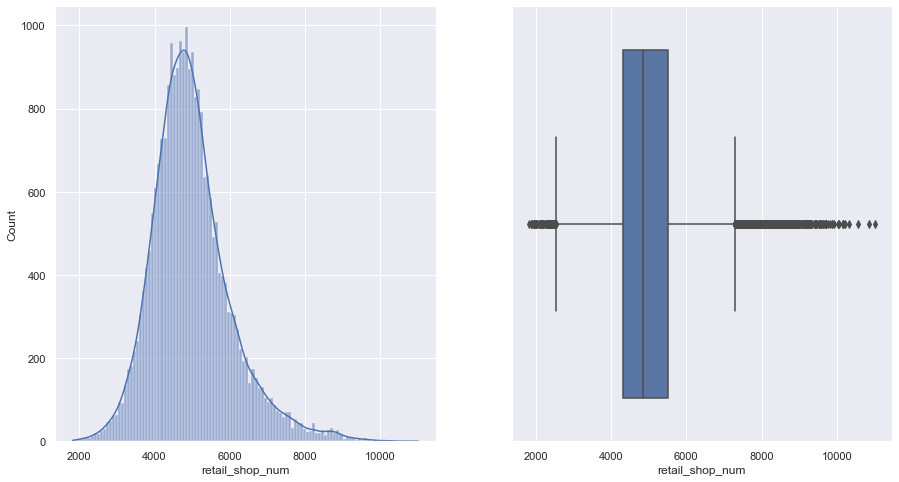

In [60]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,8)
sns.histplot(data['retail_shop_num'], kde=True,ax=axes[0])
sns.boxplot(data['retail_shop_num'],ax=axes[1]);

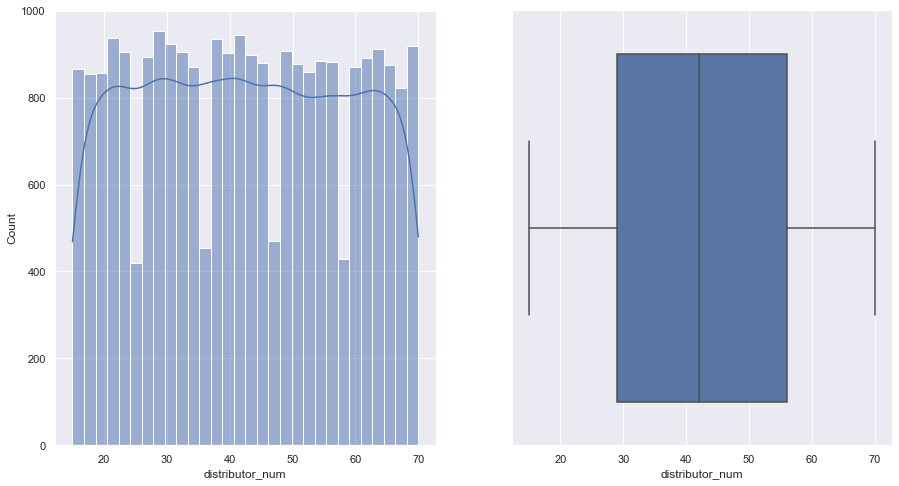

In [61]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,8)
sns.histplot(data['distributor_num'], kde=True,ax=axes[0])
sns.boxplot(data['distributor_num'],ax=axes[1]);

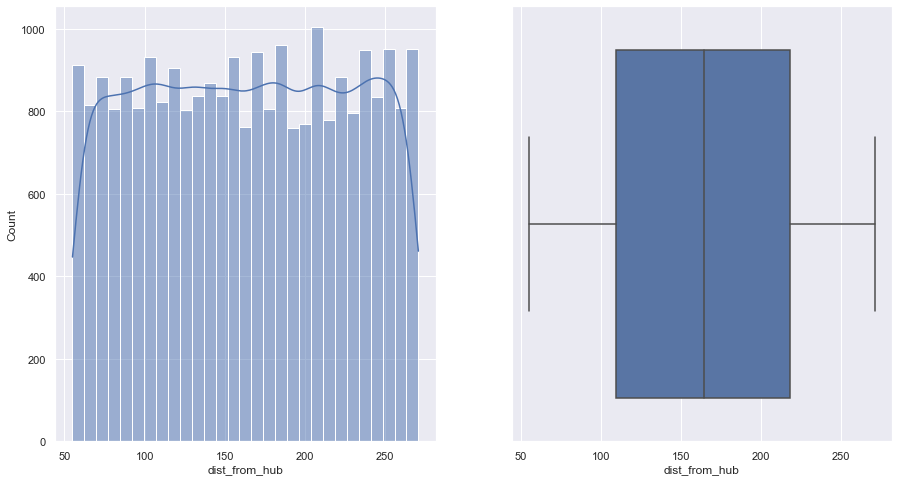

In [62]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,8)
sns.histplot(data['dist_from_hub'], kde=True,ax=axes[0])
sns.boxplot(data['dist_from_hub'],ax=axes[1]);

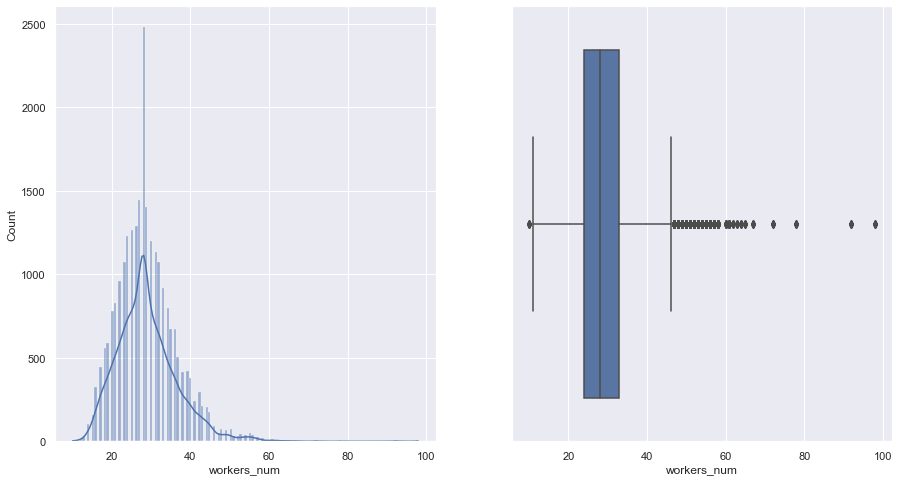

In [63]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,8)
sns.histplot(data['workers_num'], kde=True,ax=axes[0])
sns.boxplot(data['workers_num'],ax=axes[1]);

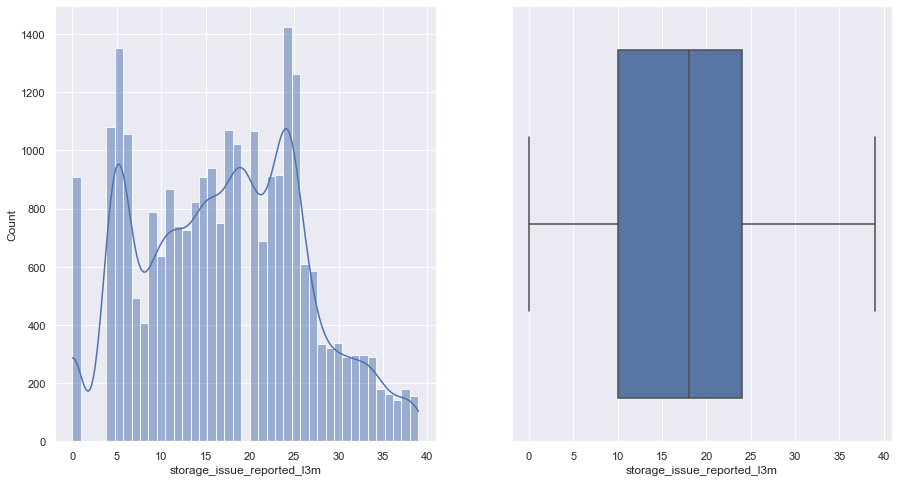

In [64]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,8)
sns.histplot(data['storage_issue_reported_l3m'], kde=True,ax=axes[0])
sns.boxplot(data['storage_issue_reported_l3m'],ax=axes[1]);

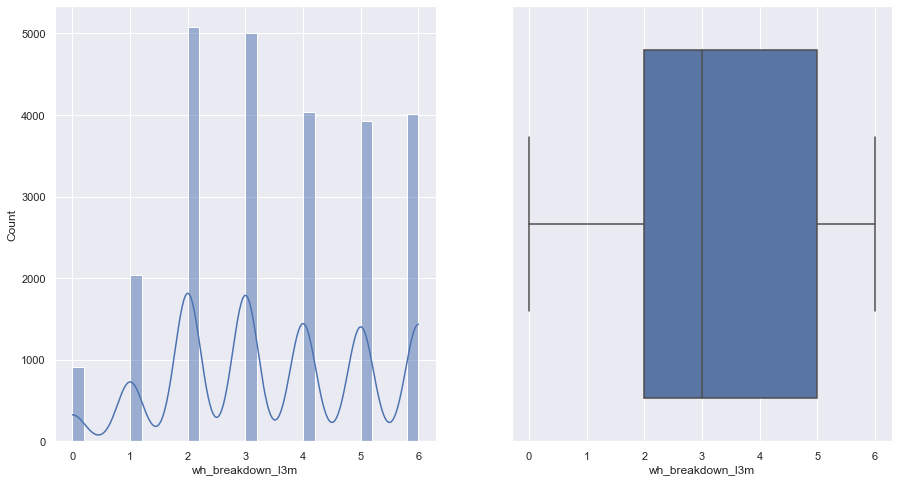

In [65]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,8)
sns.histplot(data['wh_breakdown_l3m'], kde=True,ax=axes[0])
sns.boxplot(data['wh_breakdown_l3m'],ax=axes[1]);

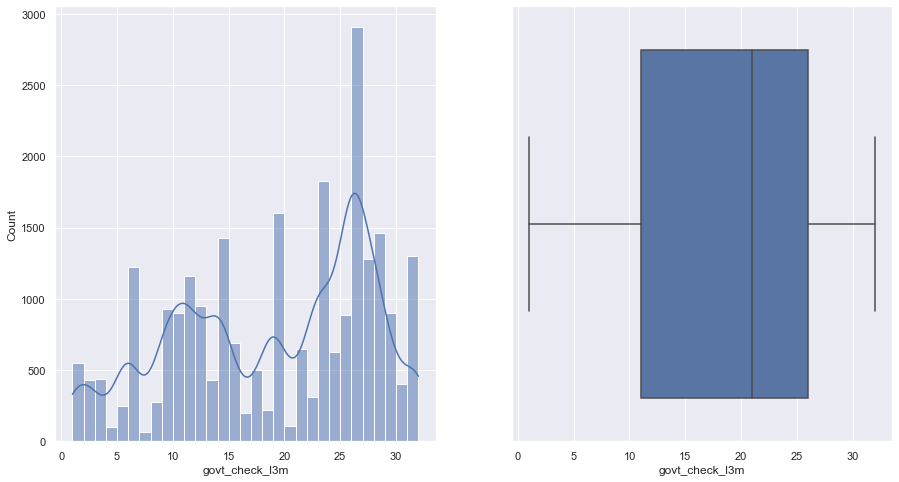

In [66]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,8)
sns.histplot(data['govt_check_l3m'], kde=True,ax=axes[0])
sns.boxplot(data['govt_check_l3m'],ax=axes[1]);

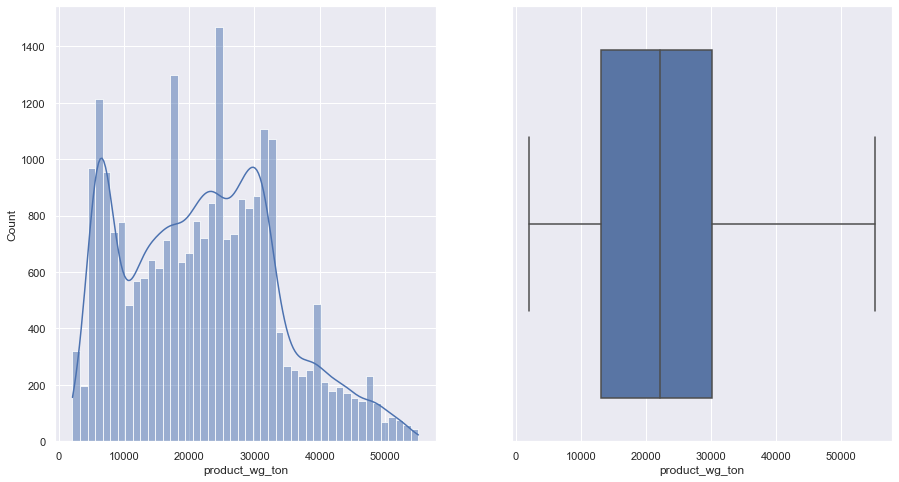

In [67]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,8)
sns.histplot(data['product_wg_ton'], kde=True,ax=axes[0])
sns.boxplot(data['product_wg_ton'],ax=axes[1]);

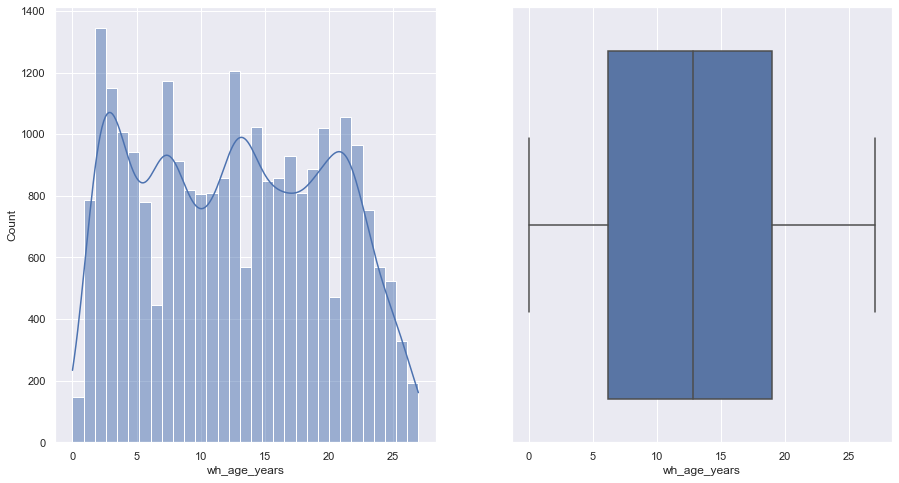

In [68]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,8)
sns.histplot(data['wh_age_years'], kde=True,ax=axes[0])
sns.boxplot(data['wh_age_years'],ax=axes[1]);

# Bi Variate Analysis

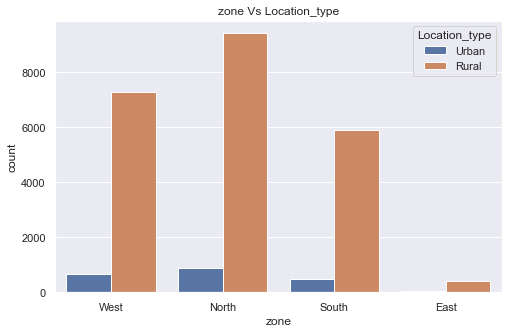

In [69]:
plt.figure(figsize=(8,5))
plt.title('zone Vs Location_type')
sns.countplot(data['zone'],hue=data['Location_type']);

In [70]:
pd.crosstab(data['zone'],data['Location_type'],normalize=True,margins=True).round(2)

Location_type  Rural  Urban   All
zone                             
East            0.02   0.00  0.02
North           0.38   0.04  0.41
South           0.24   0.02  0.25
West            0.29   0.03  0.32
All             0.92   0.08  1.00

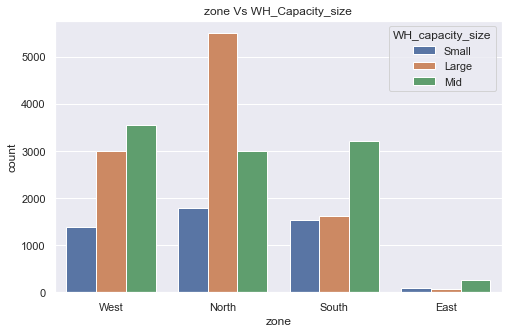

In [71]:
plt.figure(figsize=(8,5))
plt.title('zone Vs WH_Capacity_size')
sns.countplot(data['zone'],hue=data['WH_capacity_size']);

In [72]:
pd.crosstab(data['zone'],data['WH_capacity_size'],normalize=True,margins=True).round(2)

WH_capacity_size  Large   Mid  Small   All
zone                                      
East               0.00  0.01   0.00  0.02
North              0.22  0.12   0.07  0.41
South              0.06  0.13   0.06  0.25
West               0.12  0.14   0.06  0.32
All                0.41  0.40   0.19  1.00

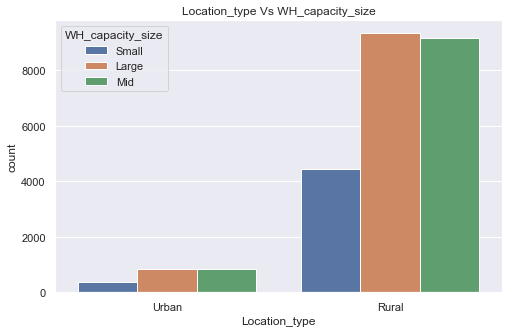

In [73]:
plt.figure(figsize=(8,5))
plt.title('Location_type Vs WH_capacity_size')
sns.countplot(data['Location_type'],hue=data['WH_capacity_size']);

In [74]:
pd.crosstab(data['Location_type'],data['WH_capacity_size'],normalize=True,margins=True).round(2)

WH_capacity_size  Large   Mid  Small   All
Location_type                             
Rural              0.37  0.37   0.18  0.92
Urban              0.03  0.03   0.01  0.08
All                0.41  0.40   0.19  1.00

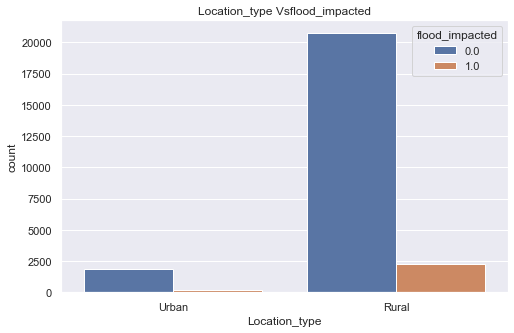

In [75]:
plt.figure(figsize=(8,5))
plt.title('Location_type Vsflood_impacted')
sns.countplot(data['Location_type'],hue=data['flood_impacted']);

In [76]:
pd.crosstab(data['Location_type'],data['flood_impacted'],normalize=True,margins=True).round(2)

flood_impacted   0.0   1.0   All
Location_type                   
Rural           0.83  0.09  0.92
Urban           0.07  0.01  0.08
All             0.90  0.10  1.00

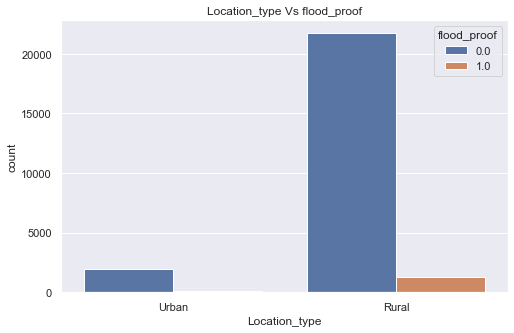

In [77]:
plt.figure(figsize=(8,5))
plt.title('Location_type Vs flood_proof')
sns.countplot(data['Location_type'],hue=data['flood_proof']);

In [78]:
pd.crosstab(data['Location_type'],data['flood_proof'],normalize=True,margins=True).round(2)

flood_proof     0.0   1.0   All
Location_type                  
Rural          0.87  0.05  0.92
Urban          0.08  0.00  0.08
All            0.95  0.05  1.00

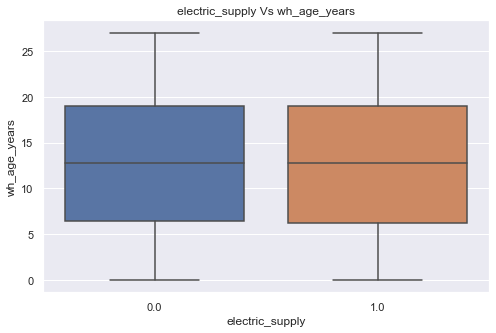

In [79]:
plt.figure(figsize=(8,5))
plt.title('electric_supply Vs wh_age_years')
sns.boxplot(data['electric_supply'],data['wh_age_years']);

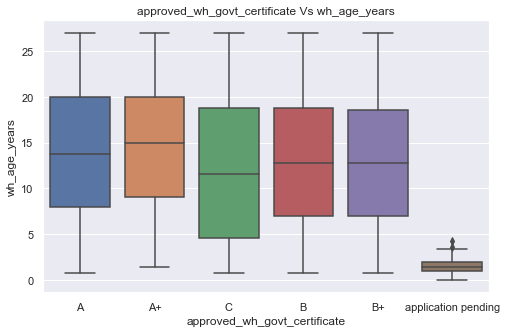

In [80]:
plt.figure(figsize=(8,5))
plt.title('approved_wh_govt_certificate Vs wh_age_years')
sns.boxplot(data['approved_wh_govt_certificate'],data['wh_age_years']);

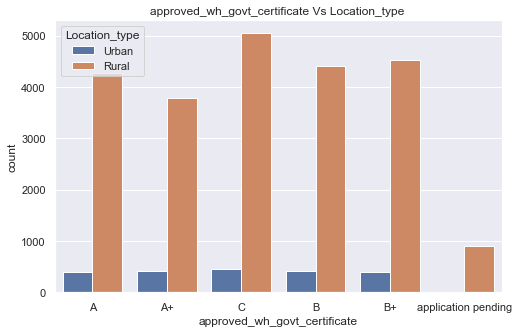

In [81]:
plt.figure(figsize=(8,5))
plt.title('approved_wh_govt_certificate Vs Location_type ')
sns.countplot(data['approved_wh_govt_certificate'],hue=data['Location_type']);

In [82]:
pd.crosstab(data['Location_type'],data['approved_wh_govt_certificate'],normalize=True,margins=True).round(2)

approved_wh_govt_certificate     A    A+     B    B+     C  \
Location_type                                                
Rural                         0.17  0.15  0.18  0.18  0.20   
Urban                         0.02  0.02  0.02  0.02  0.02   
All                           0.19  0.17  0.19  0.20  0.22   

approved_wh_govt_certificate  application pending   All  
Location_type                                            
Rural                                        0.04  0.92  
Urban                                        0.00  0.08  
All                                          0.04  1.00

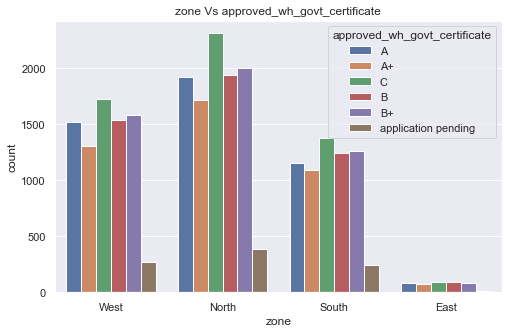

In [83]:
plt.figure(figsize=(8,5))
plt.title('zone Vs approved_wh_govt_certificate')
sns.countplot(data['zone'],hue=data['approved_wh_govt_certificate']);

In [84]:
pd.crosstab(data['zone'],data['approved_wh_govt_certificate'],normalize=True,margins=True).round(2)

approved_wh_govt_certificate     A    A+     B    B+     C  \
zone                                                         
East                          0.00  0.00  0.00  0.00  0.00   
North                         0.08  0.07  0.08  0.08  0.09   
South                         0.05  0.04  0.05  0.05  0.05   
West                          0.06  0.05  0.06  0.06  0.07   
All                           0.19  0.17  0.19  0.20  0.22   

approved_wh_govt_certificate  application pending   All  
zone                                                     
East                                         0.00  0.02  
North                                        0.02  0.41  
South                                        0.01  0.25  
West                                         0.01  0.32  
All                                          0.04  1.00

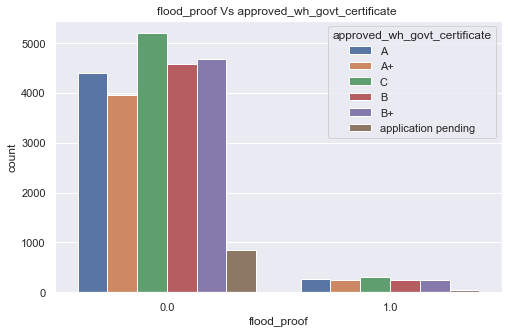

In [85]:
plt.figure(figsize=(8,5))
plt.title('flood_proof Vs approved_wh_govt_certificate ')
sns.countplot(data['flood_proof'],hue=data['approved_wh_govt_certificate']);

In [86]:
pd.crosstab(data['flood_proof'],data['approved_wh_govt_certificate'],normalize=True,margins=True).round(2)

approved_wh_govt_certificate     A    A+     B    B+     C  \
flood_proof                                                  
0.0                           0.18  0.16  0.18  0.19  0.21   
1.0                           0.01  0.01  0.01  0.01  0.01   
All                           0.19  0.17  0.19  0.20  0.22   

approved_wh_govt_certificate  application pending   All  
flood_proof                                              
0.0                                          0.03  0.95  
1.0                                          0.00  0.05  
All                                          0.04  1.00

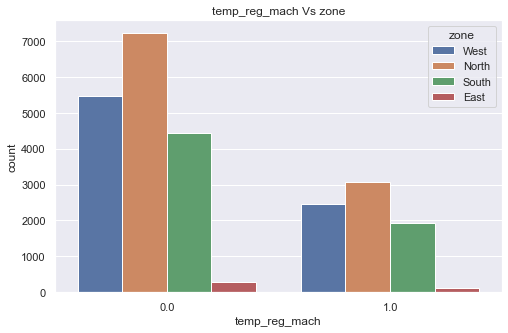

In [87]:
plt.figure(figsize=(8,5))
plt.title('temp_reg_mach Vs zone')
sns.countplot(data['temp_reg_mach'],hue=data['zone']);

In [88]:
pd.crosstab(data['zone'],data['temp_reg_mach'],normalize=True,margins=True).round(2)

temp_reg_mach   0.0   1.0   All
zone                           
East           0.01  0.01  0.02
North          0.29  0.12  0.41
South          0.18  0.08  0.25
West           0.22  0.10  0.32
All            0.70  0.30  1.00

In [89]:
data[num].columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton', 'wh_age_years'],
      dtype='object')

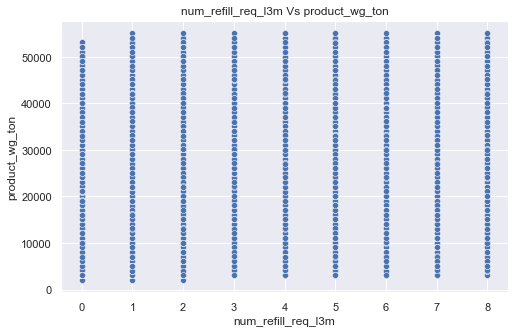

In [90]:
plt.figure(figsize=(8,5))
plt.title('num_refill_req_l3m Vs product_wg_ton')
sns.scatterplot(data['num_refill_req_l3m'],data['product_wg_ton']);

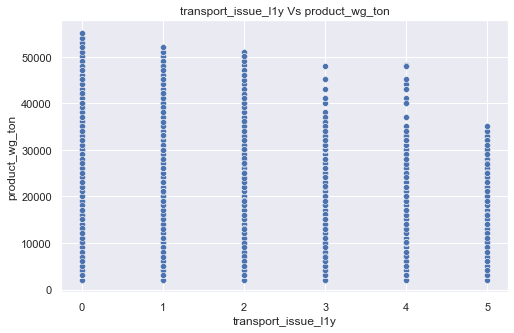

In [91]:
plt.figure(figsize=(8,5))
plt.title('transport_issue_l1y Vs product_wg_ton')
sns.scatterplot(data['transport_issue_l1y'],data['product_wg_ton']);

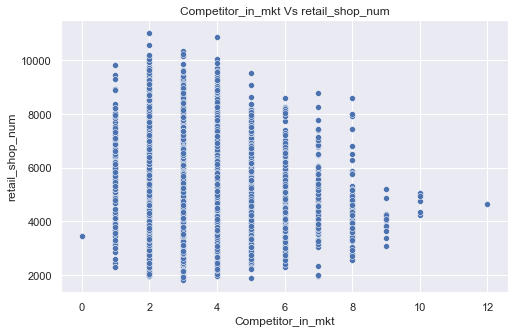

In [92]:
plt.figure(figsize=(8,5))
plt.title('Competitor_in_mkt Vs retail_shop_num')
sns.scatterplot(data['Competitor_in_mkt'],data['retail_shop_num']);

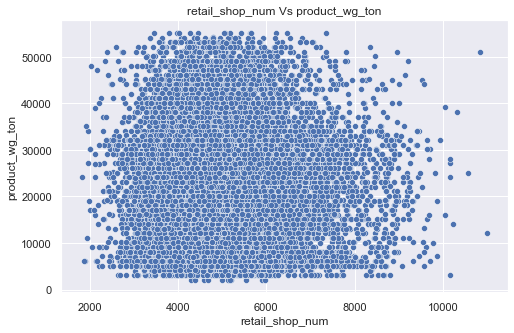

In [93]:
plt.figure(figsize=(8,5))
plt.title('retail_shop_num Vs product_wg_ton')
sns.scatterplot(data['retail_shop_num'],data['product_wg_ton']);

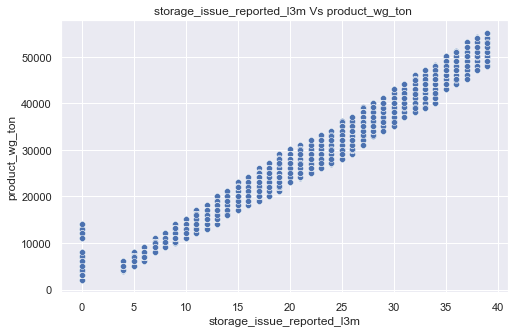

In [94]:
plt.figure(figsize=(8,5))
plt.title('storage_issue_reported_l3m Vs product_wg_ton ')
sns.scatterplot(data['storage_issue_reported_l3m'],data['product_wg_ton']);

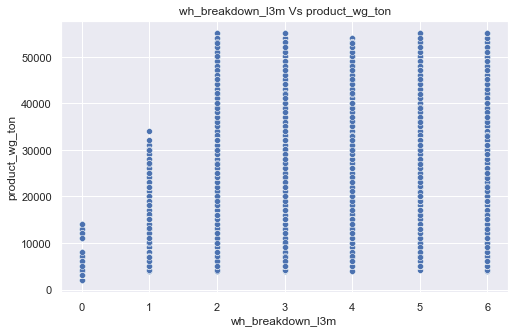

In [95]:
plt.figure(figsize=(8,5))
plt.title('wh_breakdown_l3m Vs product_wg_ton')
sns.scatterplot(data['wh_breakdown_l3m'],data['product_wg_ton']);

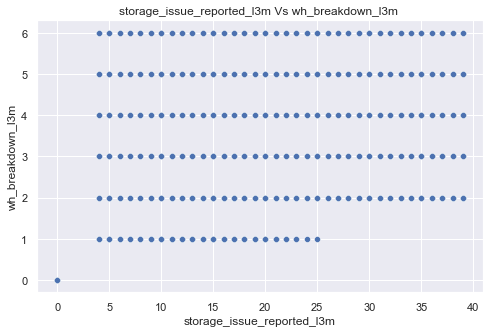

In [96]:
plt.figure(figsize=(8,5))
plt.title('storage_issue_reported_l3m Vs wh_breakdown_l3m ')
sns.scatterplot(data['storage_issue_reported_l3m'],data['wh_breakdown_l3m']);

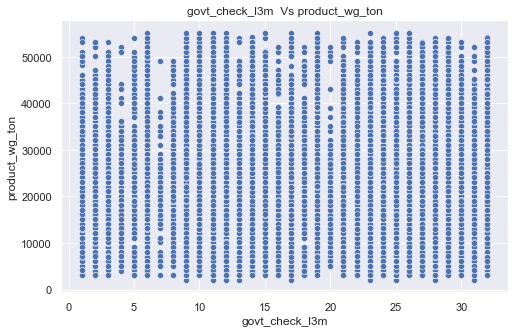

In [97]:
plt.figure(figsize=(8,5))
plt.title('govt_check_l3m  Vs product_wg_ton')
sns.scatterplot(data['govt_check_l3m'],data['product_wg_ton']);

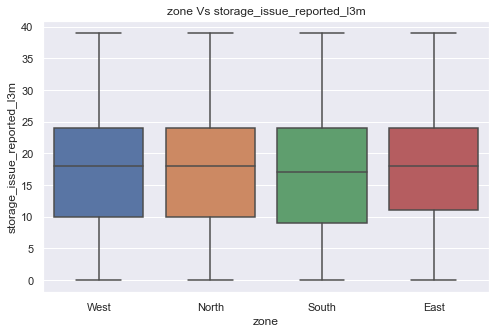

In [98]:
plt.figure(figsize=(8,5))
plt.title('zone Vs storage_issue_reported_l3m')
sns.boxplot(data['zone'],data['storage_issue_reported_l3m']);

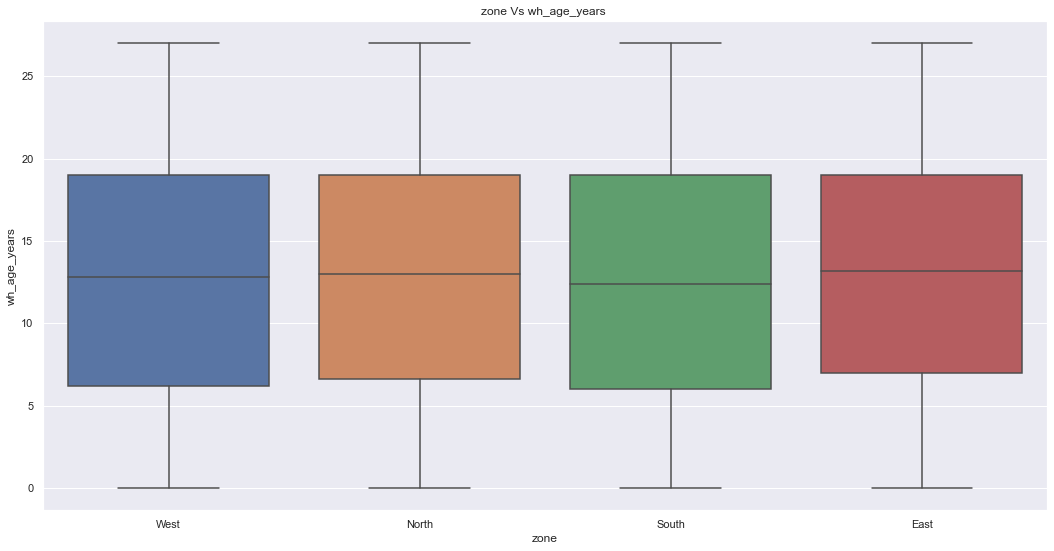

In [99]:
plt.figure(figsize=(18,9))
plt.title('zone Vs wh_age_years ')
sns.boxplot(data['zone'],data['wh_age_years']);

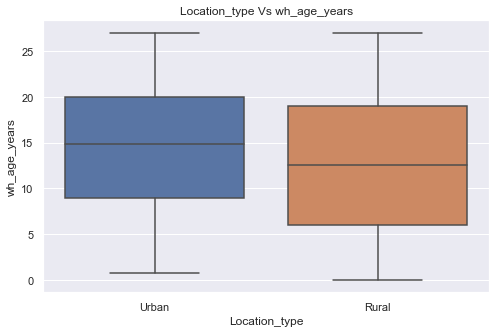

In [100]:
plt.figure(figsize=(8,5))
plt.title('Location_type Vs wh_age_years')
sns.boxplot(data['Location_type'],data['wh_age_years']);

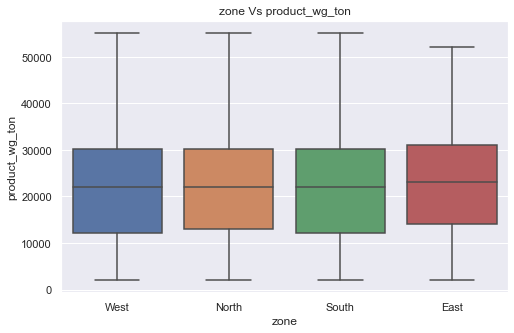

In [101]:
plt.figure(figsize=(8,5))
plt.title('zone Vs product_wg_ton')
sns.boxplot(data['zone'],data['product_wg_ton']);

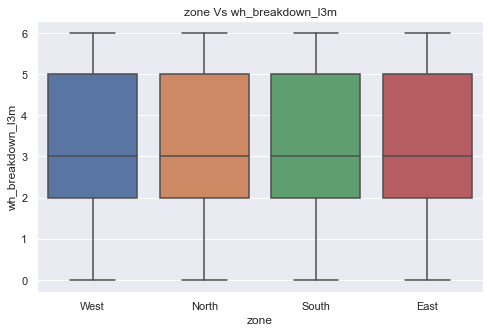

In [102]:
plt.figure(figsize=(8,5))
plt.title('zone Vs wh_breakdown_l3m')
sns.boxplot(data['zone'],data['wh_breakdown_l3m']);

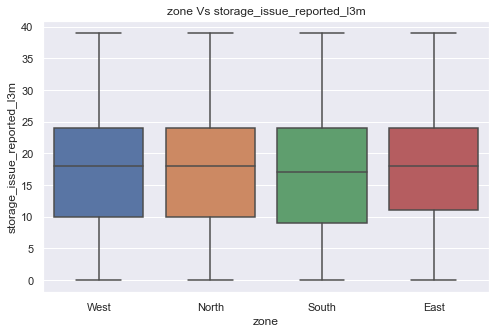

In [103]:
plt.figure(figsize=(8,5))
plt.title('zone Vs storage_issue_reported_l3m')
sns.boxplot(data['zone'],data['storage_issue_reported_l3m']);

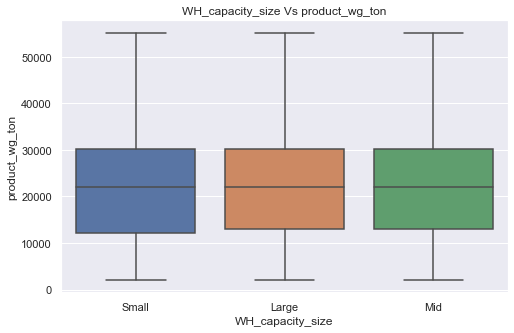

In [104]:
plt.figure(figsize=(8,5))
plt.title('WH_capacity_size Vs product_wg_ton')
sns.boxplot(data['WH_capacity_size'],data['product_wg_ton']);

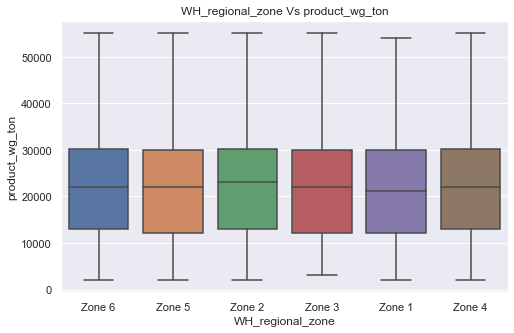

In [105]:
plt.figure(figsize=(8,5))
plt.title('WH_regional_zone Vs product_wg_ton')
sns.boxplot(data['WH_regional_zone'],data['product_wg_ton']);

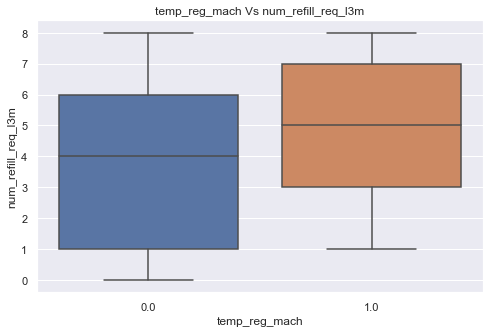

In [106]:
plt.figure(figsize=(8,5))
plt.title('temp_reg_mach Vs num_refill_req_l3m')
sns.boxplot(data['temp_reg_mach'],data['num_refill_req_l3m']);

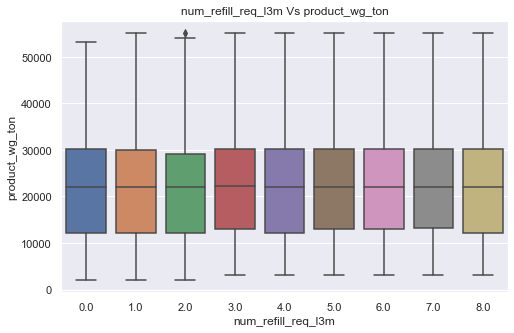

In [107]:
plt.figure(figsize=(8,5))
plt.title('num_refill_req_l3m Vs product_wg_ton')
sns.boxplot(data['num_refill_req_l3m'],data['product_wg_ton']);

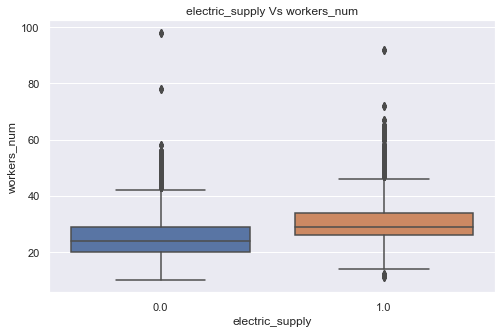

In [108]:
plt.figure(figsize=(8,5))
plt.title('electric_supply Vs workers_num')
sns.boxplot(data['electric_supply'],data['workers_num']);

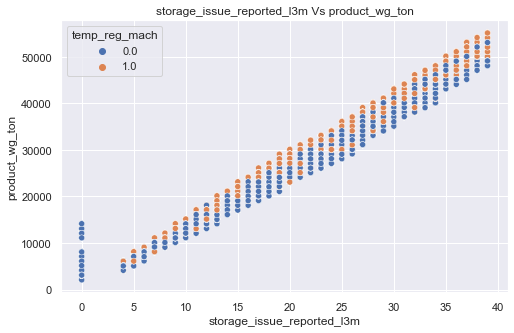

In [109]:
plt.figure(figsize=(8,5))
plt.title('storage_issue_reported_l3m Vs product_wg_ton')
sns.scatterplot(data['storage_issue_reported_l3m'],data['product_wg_ton'],hue=data['temp_reg_mach']);

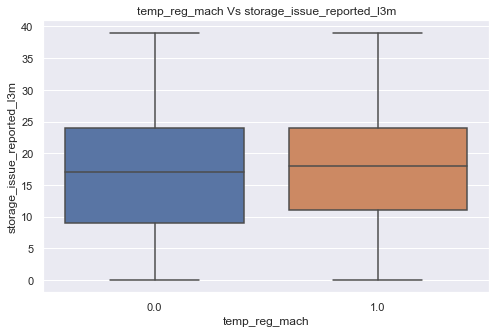

In [110]:
plt.figure(figsize=(8,5))
plt.title('temp_reg_mach Vs storage_issue_reported_l3m')
sns.boxplot(data['temp_reg_mach'],data['storage_issue_reported_l3m'],);

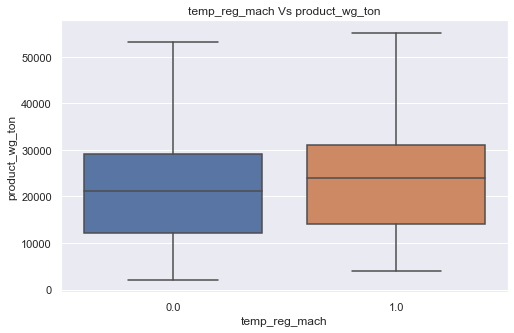

In [111]:
plt.figure(figsize=(8,5))
plt.title('temp_reg_mach Vs product_wg_ton')
sns.boxplot(data['temp_reg_mach'],data['product_wg_ton']);

### Outlier Treatment

In [112]:
outlier_col=['transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num','workers_num']

In [113]:
def remove_outlier(col):
    sorted(col)
    q1,q3=np.percentile(col,(25,75))
    IQR=q3-q1
    lr=q1-(1.5*IQR)
    ur=q3+(1.5*IQR)
    return lr,ur

In [114]:
lr,ur= remove_outlier(data['transport_issue_l1y'])
print(lr,ur)

-1.5 2.5


In [115]:
data['transport_issue_l1y']=np.where(data['transport_issue_l1y']<lr,lr,data['transport_issue_l1y'])
data['transport_issue_l1y']=np.where(data['transport_issue_l1y']>ur,ur,data['transport_issue_l1y'])

In [116]:
lr,ur= remove_outlier(data['Competitor_in_mkt'])
print(lr,ur)

-1.0 7.0


In [117]:
data['Competitor_in_mkt']=np.where(data['Competitor_in_mkt']<lr,lr,data['Competitor_in_mkt'])
data['Competitor_in_mkt']=np.where(data['Competitor_in_mkt']>ur,ur,data['Competitor_in_mkt'])

In [118]:
lr,ur= remove_outlier(data['retail_shop_num'])
print(lr,ur)

2532.5 7280.5


In [119]:
data['retail_shop_num']=np.where(data['retail_shop_num']<lr,lr,data['retail_shop_num'])
data['retail_shop_num']=np.where(data['retail_shop_num']>ur,ur,data['retail_shop_num'])

In [120]:
lr,ur= remove_outlier(data['workers_num'])
print(lr,ur)

10.5 46.5


In [121]:
data['workers_num']=np.where(data['workers_num']<lr,lr,data['workers_num'])
data['workers_num']=np.where(data['workers_num']>ur,ur,data['workers_num'])

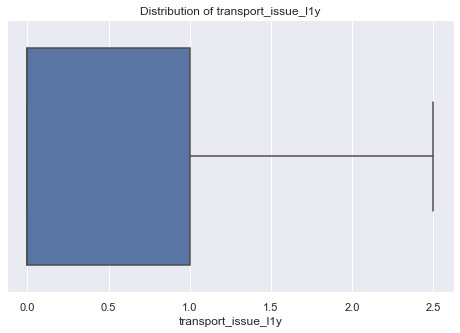

In [122]:
plt.figure(figsize=(8,5))
plt.title('Distribution of transport_issue_l1y')
sns.boxplot(data['transport_issue_l1y']);

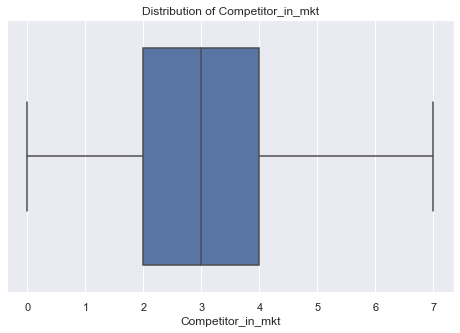

In [123]:
plt.figure(figsize=(8,5))
plt.title('Distribution of Competitor_in_mkt')
sns.boxplot(data['Competitor_in_mkt']);

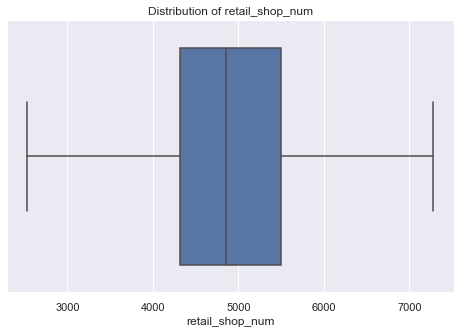

In [124]:
plt.figure(figsize=(8,5))
plt.title('Distribution of retail_shop_num')
sns.boxplot(data['retail_shop_num']);

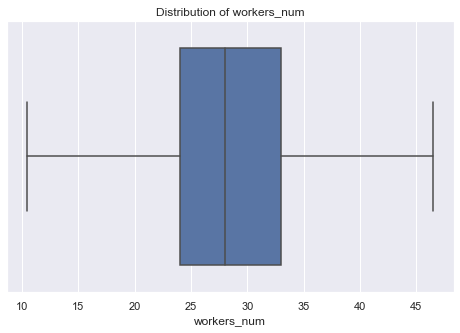

In [125]:
plt.figure(figsize=(8,5))
plt.title('Distribution of workers_num')
sns.boxplot(data['workers_num']);

### Multivariate Analysis

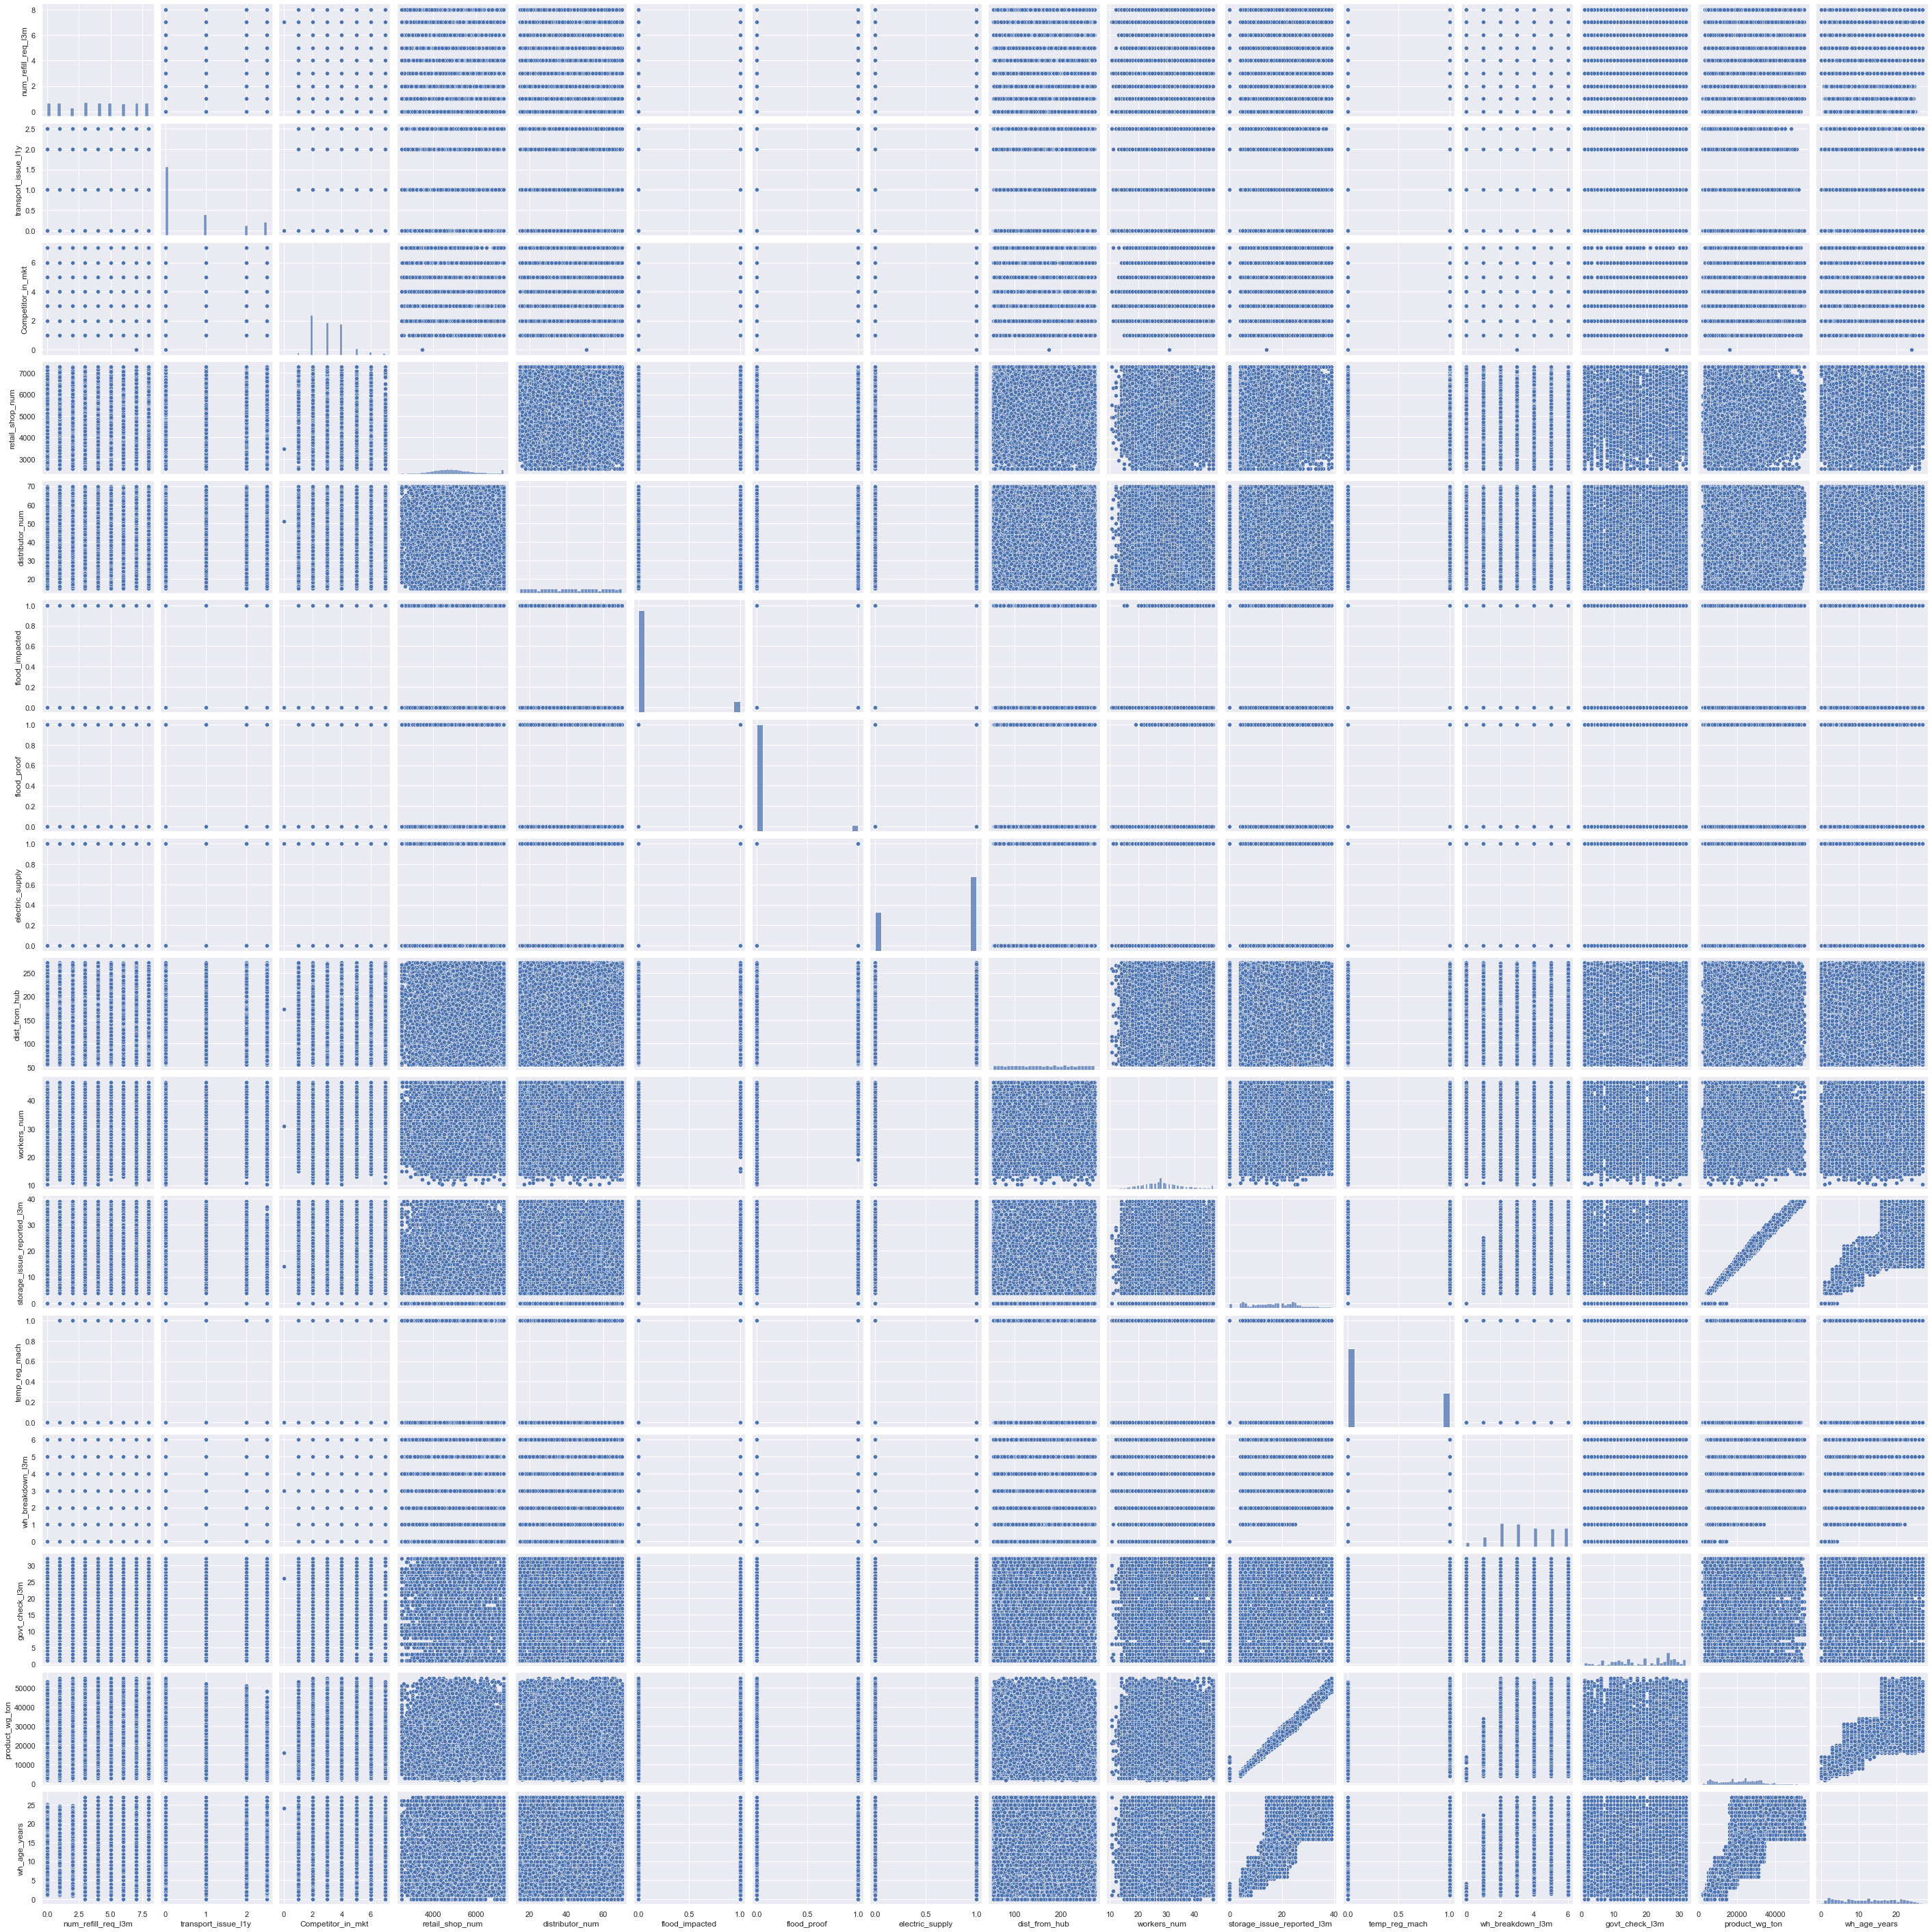

In [126]:
sns.pairplot(data);

### Correlation plot

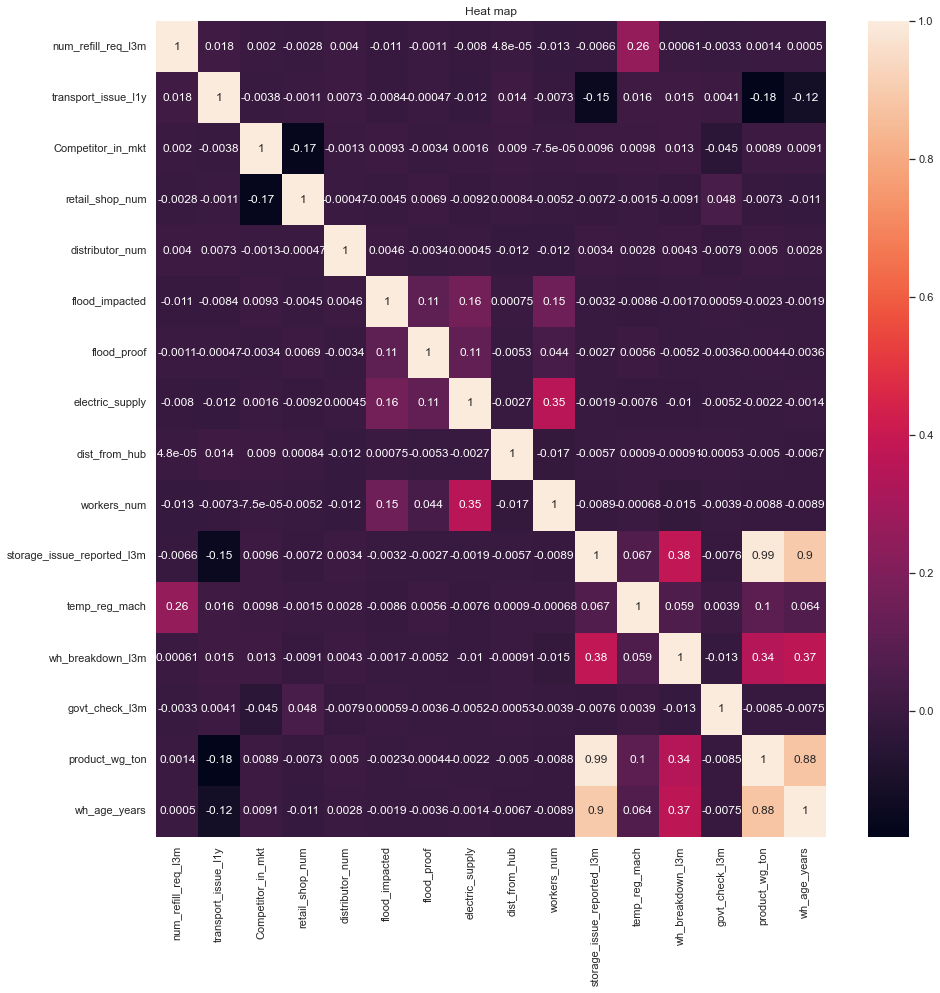

In [127]:
corr=data.corr()
plt.figure(figsize=(15,15))
plt.title('Heat map')
sns.heatmap(corr,annot=True);

In [128]:
cat

['Location_type',
 'WH_capacity_size',
 'zone',
 'WH_regional_zone',
 'wh_owner_type',
 'approved_wh_govt_certificate']

# One wayAnova

In [129]:
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

In [130]:
formula = 'product_wg_ton ~ C(Location_type)'
model = ols(formula, data).fit()
aov_table = anova_lm(model)
print(aov_table)

                       df        sum_sq       mean_sq           F  \
C(Location_type)      1.0  1.872875e+10  1.872875e+10  139.770772   
Residual          24998.0  3.349636e+12  1.339962e+08         NaN   

                        PR(>F)  
C(Location_type)  3.639843e-32  
Residual                   NaN  


# Drawing a Point Plot

<AxesSubplot:xlabel='Location_type', ylabel='product_wg_ton'>

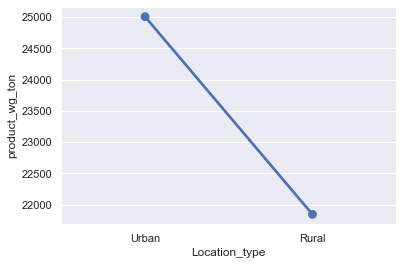

In [131]:
sns.pointplot(x='Location_type', y='product_wg_ton', data=data, ci=None)

In [132]:
formula = 'product_wg_ton ~ C(WH_capacity_size)'
model = ols(formula, data).fit()
aov_table = anova_lm(model)
print(aov_table)

                          df        sum_sq       mean_sq         F    PR(>F)
C(WH_capacity_size)      2.0  2.979142e+08  1.489571e+08  1.105525  0.331053
Residual             24997.0  3.368067e+12  1.347388e+08       NaN       NaN


In [133]:
formula = 'product_wg_ton ~ C(zone)'
model = ols(formula, data).fit()
aov_table = anova_lm(model)
print(aov_table)

               df        sum_sq       mean_sq         F    PR(>F)
C(zone)       3.0  4.468839e+08  1.489613e+08  1.105561  0.345349
Residual  24996.0  3.367918e+12  1.347383e+08       NaN       NaN


In [134]:
formula = 'product_wg_ton ~ C(WH_regional_zone)'
model = ols(formula, data).fit()
aov_table = anova_lm(model)
print(aov_table)

                          df        sum_sq       mean_sq         F    PR(>F)
C(WH_regional_zone)      5.0  7.713408e+08  1.542682e+08  1.144966  0.333954
Residual             24994.0  3.367593e+12  1.347361e+08       NaN       NaN


In [135]:
formula = 'product_wg_ton ~ C(wh_owner_type)'
model = ols(formula, data).fit()
aov_table = anova_lm(model)
print(aov_table)

                       df        sum_sq       mean_sq        F    PR(>F)
C(wh_owner_type)      1.0  1.135892e+08  1.135892e+08  0.84302  0.358543
Residual          24998.0  3.368251e+12  1.347408e+08      NaN       NaN


In [136]:
formula = 'product_wg_ton ~ C(approved_wh_govt_certificate)'
model = ols(formula, data).fit()
aov_table = anova_lm(model)
print(aov_table)

                                      df        sum_sq       mean_sq  \
C(approved_wh_govt_certificate)      5.0  3.736476e+11  7.472953e+10   
Residual                         24994.0  2.994717e+12  1.198174e+08   

                                          F  PR(>F)  
C(approved_wh_govt_certificate)  623.694905     0.0  
Residual                                NaN     NaN  


<AxesSubplot:xlabel='approved_wh_govt_certificate', ylabel='product_wg_ton'>

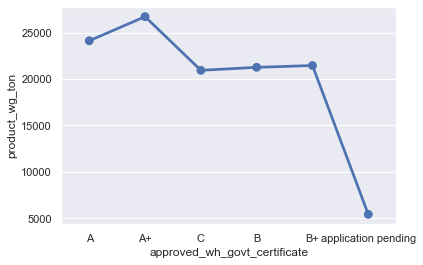

In [137]:
sns.pointplot(x='approved_wh_govt_certificate', y='product_wg_ton', data=data, ci=None)

## Feature Engineering

### One Hot Encoding

In [138]:
cat1=['Location_type','zone', 'WH_regional_zone','wh_owner_type']

In [139]:
data_new=pd.get_dummies(data,columns=cat1,drop_first=True)

In [140]:
data_new.head()

WH_capacity_size  num_refill_req_l3m  transport_issue_l1y  \
0            Small                 3.0                  1.0   
1            Large                 0.0                  0.0   
2              Mid                 1.0                  0.0   
3              Mid                 7.0                  2.5   
4            Large                 3.0                  1.0   

   Competitor_in_mkt  retail_shop_num  distributor_num  flood_impacted  \
0                2.0           4651.0             24.0             0.0   
1                4.0           6217.0             47.0             0.0   
2                4.0           4306.0             64.0             0.0   
3                2.0           6000.0             50.0             0.0   
4                2.0           4740.0             42.0             1.0   

   flood_proof  electric_supply  dist_from_hub  ...  Location_type_Urban  \
0          1.0              1.0           91.0  ...                    1   
1          0.0              1.0          210.0  ...                    0   
2          0.0              0.0          161.0  ...                    0   
3          0.0              0.0          103.0  ...                    0   
4          0.0              1.0          112.0  ...                    0   

   zone_North  zone_South zone_West  WH_regional_zone_Zone 2  \
0           0           0         1                        0   
1           1           0         0                        0   
2           0           1         0                        1   
3           1           0         0                        0   
4           1           0         0                        0   

   WH_regional_zone_Zone 3  WH_regional_zone_Zone 4  WH_regional_zone_Zone 5  \
0                        0                        0                        0   
1                        0                        0                        1   
2                        0                        0                        0   
3                        1                        0                        0   
4                        0                        0                        1   

   WH_regional_zone_Zone 6  wh_owner_type_Rented  
0                        1                     1  
1                        0                     0  
2                        0                     0  
3                        0                     1  
4                        0                     0  

[5 rows x 28 columns]

### Label Encoding

In [141]:
data_new['WH_capacity_size']=data_new['WH_capacity_size'].replace('Small',0)
data_new['WH_capacity_size']=data_new['WH_capacity_size'].replace('Mid',1)
data_new['WH_capacity_size']=data_new['WH_capacity_size'].replace('Large',2)

In [142]:
data_new['approved_wh_govt_certificate']=data_new['approved_wh_govt_certificate'].replace('A+',5)
data_new['approved_wh_govt_certificate']=data_new['approved_wh_govt_certificate'].replace('A',4)
data_new['approved_wh_govt_certificate']=data_new['approved_wh_govt_certificate'].replace('B+',3)
data_new['approved_wh_govt_certificate']=data_new['approved_wh_govt_certificate'].replace('B',2)
data_new['approved_wh_govt_certificate']=data_new['approved_wh_govt_certificate'].replace('C',1)
data_new['approved_wh_govt_certificate']=data_new['approved_wh_govt_certificate'].replace('application pending',0)

In [143]:
data_new.head()

WH_capacity_size  num_refill_req_l3m  transport_issue_l1y  \
0                 0                 3.0                  1.0   
1                 2                 0.0                  0.0   
2                 1                 1.0                  0.0   
3                 1                 7.0                  2.5   
4                 2                 3.0                  1.0   

   Competitor_in_mkt  retail_shop_num  distributor_num  flood_impacted  \
0                2.0           4651.0             24.0             0.0   
1                4.0           6217.0             47.0             0.0   
2                4.0           4306.0             64.0             0.0   
3                2.0           6000.0             50.0             0.0   
4                2.0           4740.0             42.0             1.0   

   flood_proof  electric_supply  dist_from_hub  ...  Location_type_Urban  \
0          1.0              1.0           91.0  ...                    1   
1          0.0              1.0          210.0  ...                    0   
2          0.0              0.0          161.0  ...                    0   
3          0.0              0.0          103.0  ...                    0   
4          0.0              1.0          112.0  ...                    0   

   zone_North  zone_South  zone_West  WH_regional_zone_Zone 2  \
0           0           0          1                        0   
1           1           0          0                        0   
2           0           1          0                        1   
3           1           0          0                        0   
4           1           0          0                        0   

   WH_regional_zone_Zone 3  WH_regional_zone_Zone 4  WH_regional_zone_Zone 5  \
0                        0                        0                        0   
1                        0                        0                        1   
2                        0                        0                        0   
3                        1                        0                        0   
4                        0                        0                        1   

   WH_regional_zone_Zone 6  wh_owner_type_Rented  
0                        1                     1  
1                        0                     0  
2                        0                     0  
3                        0                     1  
4                        0                     0  

[5 rows x 28 columns]

In [144]:
data_new.columns

Index(['WH_capacity_size', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'distributor_num',
       'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub',
       'workers_num', 'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton', 'wh_age_years', 'Location_type_Urban', 'zone_North',
       'zone_South', 'zone_West', 'WH_regional_zone_Zone 2',
       'WH_regional_zone_Zone 3', 'WH_regional_zone_Zone 4',
       'WH_regional_zone_Zone 5', 'WH_regional_zone_Zone 6',
       'wh_owner_type_Rented'],
      dtype='object')

## Split the Data

In [145]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [146]:
x=data_new.drop(['product_wg_ton'],axis=1) #name is splitted in Model and Brand; Year is transformed to CarAge
y=data_new['product_wg_ton']

In [147]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=123,test_size=0.30)

In [148]:
ss=StandardScaler() 
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

In [149]:
from sklearn.cluster import KMeans 

In [150]:
scaled_df = pd.DataFrame(ss.fit_transform(data_new),columns=data_new.columns)

In [151]:
scaled_df.head()

WH_capacity_size  num_refill_req_l3m  transport_issue_l1y  \
0         -1.632547           -0.417807             0.374779   
1          1.056278           -1.568750            -0.714377   
2         -0.288135           -1.185102            -0.714377   
3         -0.288135            1.116783             2.008512   
4          1.056278           -0.417807             0.374779   

   Competitor_in_mkt  retail_shop_num  distributor_num  flood_impacted  \
0          -0.980772        -0.317618        -1.146546       -0.329915   
1           0.803748         1.297843         0.285226       -0.329915   
2           0.803748        -0.673514         1.343493       -0.329915   
3          -0.980772         1.073989         0.471979       -0.329915   
4          -0.980772        -0.225807        -0.026028        3.031081   

   flood_proof  electric_supply  dist_from_hub  ...  Location_type_Urban  \
0     4.159520         0.722737      -1.156575  ...             3.352150   
1    -0.240412         0.722737       0.740827  ...            -0.298316   
2    -0.240412        -1.383630      -0.040456  ...            -0.298316   
3    -0.240412        -1.383630      -0.965240  ...            -0.298316   
4    -0.240412         0.722737      -0.821739  ...            -0.298316   

   zone_North  zone_South  zone_West  WH_regional_zone_Zone 2  \
0   -0.835547   -0.584248   1.467034                -0.366682   
1    1.196821   -0.584248  -0.681648                -0.366682   
2   -0.835547    1.711602  -0.681648                 2.727159   
3    1.196821   -0.584248  -0.681648                -0.366682   
4    1.196821   -0.584248  -0.681648                -0.366682   

   WH_regional_zone_Zone 3  WH_regional_zone_Zone 4  WH_regional_zone_Zone 5  \
0                -0.360902                -0.447815                -0.474036   
1                -0.360902                -0.447815                 2.109546   
2                -0.360902                -0.447815                -0.474036   
3                 2.770838                -0.447815                -0.474036   
4                -0.360902                -0.447815                 2.109546   

   WH_regional_zone_Zone 6  wh_owner_type_Rented  
0                 1.413493              1.090302  
1                -0.707467             -0.917177  
2                -0.707467             -0.917177  
3                -0.707467              1.090302  
4                -0.707467             -0.917177  

[5 rows x 28 columns]

# Creating Clusters using KMeans

## Forming 2 Clusters with K=2

In [152]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 2,random_state=1)

In [153]:
# Fit K means on the scaled_df
k_means.fit(scaled_df)

KMeans(n_clusters=2, random_state=1)

In [154]:
# Get the labels
k_means.labels_

array([0, 1, 0, ..., 0, 0, 1])

## Within Cluster Sum of Squares

In [155]:
k_means.inertia_

644390.8744367237

### Forming clusters with K = 1,3,4,5,6 and comparing the WSS

In [156]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

700000.0000000001

In [157]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

617029.745611519

In [158]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

589320.1709876147

In [159]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

570563.5704732428

In [160]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

548364.3333669319

In [161]:
k_means = KMeans(n_clusters = 7,random_state=1)
k_means.fit(scaled_df)
k_means.inertia_

535450.5473822858

## Calculating WSS for other values of K - Elbow Method

In [162]:
wss =[] 

In [163]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [164]:
wss

[700000.0000000001,
 644390.8744367237,
 617029.745611519,
 589320.1709876147,
 570563.5704732428,
 548364.3333669319,
 535450.5473822859,
 520720.56783495785,
 505476.598726176,
 497845.1831649539]

In [165]:
a=[1,2,3,4,5,6,7,8,9,10]

<AxesSubplot:>

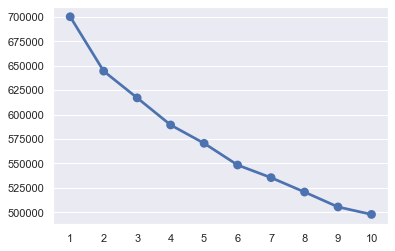

In [166]:
sns.pointplot(a, wss)

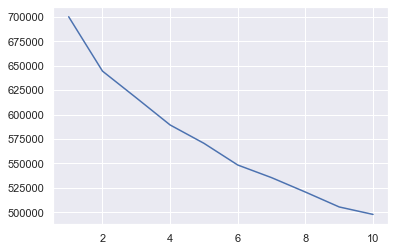

In [167]:
plt.plot(range(1,11), wss)

## KMeans with K=2

In [168]:
k_means = KMeans(n_clusters =2,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [169]:
from sklearn.metrics import silhouette_samples, silhouette_score

## Cluster evaluation for 2 clusters: the silhouette score


In [170]:
silhouette_score(scaled_df,labels,random_state=1)

0.07616682850871416

In [171]:
data_new["Clus_kmeans2"] = labels
data_new.head()

WH_capacity_size  num_refill_req_l3m  transport_issue_l1y  \
0                 0                 3.0                  1.0   
1                 2                 0.0                  0.0   
2                 1                 1.0                  0.0   
3                 1                 7.0                  2.5   
4                 2                 3.0                  1.0   

   Competitor_in_mkt  retail_shop_num  distributor_num  flood_impacted  \
0                2.0           4651.0             24.0             0.0   
1                4.0           6217.0             47.0             0.0   
2                4.0           4306.0             64.0             0.0   
3                2.0           6000.0             50.0             0.0   
4                2.0           4740.0             42.0             1.0   

   flood_proof  electric_supply  dist_from_hub  ...  zone_North  zone_South  \
0          1.0              1.0           91.0  ...           0           0   
1          0.0              1.0          210.0  ...           1           0   
2          0.0              0.0          161.0  ...           0           1   
3          0.0              0.0          103.0  ...           1           0   
4          0.0              1.0          112.0  ...           1           0   

   zone_West  WH_regional_zone_Zone 2  WH_regional_zone_Zone 3  \
0          1                        0                        0   
1          0                        0                        0   
2          0                        1                        0   
3          0                        0                        1   
4          0                        0                        0   

   WH_regional_zone_Zone 4  WH_regional_zone_Zone 5  WH_regional_zone_Zone 6  \
0                        0                        0                        1   
1                        0                        1                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        1                        0   

   wh_owner_type_Rented  Clus_kmeans2  
0                     1             0  
1                     0             1  
2                     0             0  
3                     1             0  
4                     0             0  

[5 rows x 29 columns]

<AxesSubplot:xlabel='Clus_kmeans2', ylabel='product_wg_ton'>

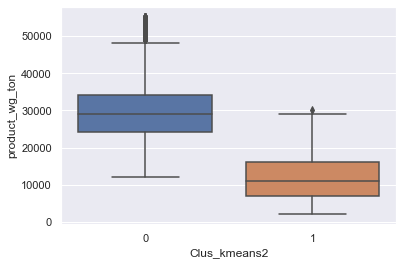

In [172]:
sns.boxplot(data_new['Clus_kmeans2'],data_new['product_wg_ton'])

In [173]:
sil_width = silhouette_samples(scaled_df,labels)

In [174]:
silhouette_samples(scaled_df,labels).min()

-0.00549505713896946

In [175]:
data_new.Clus_kmeans2.value_counts().sort_index()

0    14107
1    10893
Name: Clus_kmeans2, dtype: int64

# KMeans with K=3

In [176]:
k_means = KMeans(n_clusters =3,random_state=1)
k_means.fit(scaled_df)
labels1 = k_means.labels_

## Cluster evaluation for 3 clusters: the silhouette score

In [177]:
silhouette_score(scaled_df,labels1,random_state=1)

0.0656961988384669

In [178]:
sil_width = silhouette_samples(scaled_df,labels1)

In [179]:
silhouette_samples(scaled_df,labels1).min()

-0.0147168199977371

Based on the silhouette score it is better to have two clusters

In [180]:
data['Clus_kmeans2']=labels
data.head()

Location_type WH_capacity_size   zone WH_regional_zone  num_refill_req_l3m  \
0         Urban            Small   West           Zone 6                 3.0   
1         Rural            Large  North           Zone 5                 0.0   
2         Rural              Mid  South           Zone 2                 1.0   
3         Rural              Mid  North           Zone 3                 7.0   
4         Rural            Large  North           Zone 5                 3.0   

   transport_issue_l1y  Competitor_in_mkt  retail_shop_num  wh_owner_type  \
0                  1.0                2.0           4651.0         Rented   
1                  0.0                4.0           6217.0  Company Owned   
2                  0.0                4.0           4306.0  Company Owned   
3                  2.5                2.0           6000.0         Rented   
4                  1.0                2.0           4740.0  Company Owned   

   distributor_num  ...  dist_from_hub  workers_num  \
0             24.0  ...           91.0         29.0   
1             47.0  ...          210.0         31.0   
2             64.0  ...          161.0         37.0   
3             50.0  ...          103.0         21.0   
4             42.0  ...          112.0         25.0   

   storage_issue_reported_l3m  temp_reg_mach  approved_wh_govt_certificate  \
0                        13.0            0.0                             A   
1                         4.0            0.0                             A   
2                        17.0            0.0                             A   
3                        17.0            1.0                            A+   
4                        18.0            0.0                             C   

   wh_breakdown_l3m  govt_check_l3m product_wg_ton  wh_age_years  Clus_kmeans2  
0               5.0            15.0        17115.0           9.8             0  
1               3.0            17.0         5074.0           2.2             1  
2               6.0            22.0        23137.0          12.6             0  
3               3.0            27.0        22115.0          12.4             0  
4               6.0            24.0        24071.0          14.0             0  

[5 rows x 23 columns]

In [181]:
data_new.Clus_kmeans2.value_counts().sort_index()

0    14107
1    10893
Name: Clus_kmeans2, dtype: int64

In [182]:
data_new.to_csv('Capstone_cluster.csv')

In [183]:
data_new.head()

WH_capacity_size  num_refill_req_l3m  transport_issue_l1y  \
0                 0                 3.0                  1.0   
1                 2                 0.0                  0.0   
2                 1                 1.0                  0.0   
3                 1                 7.0                  2.5   
4                 2                 3.0                  1.0   

   Competitor_in_mkt  retail_shop_num  distributor_num  flood_impacted  \
0                2.0           4651.0             24.0             0.0   
1                4.0           6217.0             47.0             0.0   
2                4.0           4306.0             64.0             0.0   
3                2.0           6000.0             50.0             0.0   
4                2.0           4740.0             42.0             1.0   

   flood_proof  electric_supply  dist_from_hub  ...  zone_North  zone_South  \
0          1.0              1.0           91.0  ...           0           0   
1          0.0              1.0          210.0  ...           1           0   
2          0.0              0.0          161.0  ...           0           1   
3          0.0              0.0          103.0  ...           1           0   
4          0.0              1.0          112.0  ...           1           0   

   zone_West  WH_regional_zone_Zone 2  WH_regional_zone_Zone 3  \
0          1                        0                        0   
1          0                        0                        0   
2          0                        1                        0   
3          0                        0                        1   
4          0                        0                        0   

   WH_regional_zone_Zone 4  WH_regional_zone_Zone 5  WH_regional_zone_Zone 6  \
0                        0                        0                        1   
1                        0                        1                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        1                        0   

   wh_owner_type_Rented  Clus_kmeans2  
0                     1             0  
1                     0             1  
2                     0             0  
3                     1             0  
4                     0             0  

[5 rows x 29 columns]

In [184]:
cat

['Location_type',
 'WH_capacity_size',
 'zone',
 'WH_regional_zone',
 'wh_owner_type',
 'approved_wh_govt_certificate']

In [185]:
data_new.columns

Index(['WH_capacity_size', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'distributor_num',
       'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub',
       'workers_num', 'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton', 'wh_age_years', 'Location_type_Urban', 'zone_North',
       'zone_South', 'zone_West', 'WH_regional_zone_Zone 2',
       'WH_regional_zone_Zone 3', 'WH_regional_zone_Zone 4',
       'WH_regional_zone_Zone 5', 'WH_regional_zone_Zone 6',
       'wh_owner_type_Rented', 'Clus_kmeans2'],
      dtype='object')

In [186]:
df=data_new[['num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'distributor_num',
       'dist_from_hub','workers_num', 'storage_issue_reported_l3m','wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton','Clus_kmeans2']]

In [187]:
df.head()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0                 3.0                  1.0                2.0   
1                 0.0                  0.0                4.0   
2                 1.0                  0.0                4.0   
3                 7.0                  2.5                2.0   
4                 3.0                  1.0                2.0   

   retail_shop_num  distributor_num  dist_from_hub  workers_num  \
0           4651.0             24.0           91.0         29.0   
1           6217.0             47.0          210.0         31.0   
2           4306.0             64.0          161.0         37.0   
3           6000.0             50.0          103.0         21.0   
4           4740.0             42.0          112.0         25.0   

   storage_issue_reported_l3m  wh_breakdown_l3m  govt_check_l3m  \
0                        13.0               5.0            15.0   
1                         4.0               3.0            17.0   
2                        17.0               6.0            22.0   
3                        17.0               3.0            27.0   
4                        18.0               6.0            24.0   

   product_wg_ton  Clus_kmeans2  
0         17115.0             0  
1          5074.0             1  
2         23137.0             0  
3         22115.0             0  
4         24071.0             0

## Cluster Profiling

In [188]:
clust_profile=df.groupby('Clus_kmeans2').mean()
clust_profile['freq']=data_new.Clus_kmeans2.value_counts().sort_index()
clust_profile.T

Clus_kmeans2                           0             1
num_refill_req_l3m              4.073013      4.109795
transport_issue_l1y             0.521691      0.829707
Competitor_in_mkt               3.116183      3.077206
retail_shop_num              4951.533955   4968.423804
distributor_num                42.439853     42.389975
dist_from_hub                 162.948749    164.299550
workers_num                    28.661409     28.833746
storage_issue_reported_l3m     23.643936      8.695125
wh_breakdown_l3m                4.057985      2.736161
govt_check_l3m                 18.700929     18.956486
product_wg_ton              30270.602396  11524.688791
freq                        14107.000000  10893.000000

In [189]:
clust_profile2=df.groupby('Clus_kmeans2').sum()
clust_profile2['freq']=data_new.Clus_kmeans2.value_counts().sort_index()
clust_profile2.T

Clus_kmeans2                          0            1
num_refill_req_l3m              57458.0      44768.0
transport_issue_l1y              7359.5       9038.0
Competitor_in_mkt               43960.0      33520.0
retail_shop_num              69851289.5   54121040.5
distributor_num                598699.0     461754.0
dist_from_hub                 2298718.0    1789715.0
workers_num                    404326.5     314086.0
storage_issue_reported_l3m     333545.0      94716.0
wh_breakdown_l3m                57246.0      29805.0
govt_check_l3m                 263814.0     206493.0
product_wg_ton              427027388.0  125538435.0
freq                            14107.0      10893.0

In [190]:
clust_profile.T.to_csv('capstone_cluster.csv')

In [191]:
clust_profile

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
Clus_kmeans2                                                               
0                       4.073013             0.521691           3.116183   
1                       4.109795             0.829707           3.077206   

              retail_shop_num  distributor_num  dist_from_hub  workers_num  \
Clus_kmeans2                                                                 
0                 4951.533955        42.439853     162.948749    28.661409   
1                 4968.423804        42.389975     164.299550    28.833746   

              storage_issue_reported_l3m  wh_breakdown_l3m  govt_check_l3m  \
Clus_kmeans2                                                                 
0                              23.643936          4.057985       18.700929   
1                               8.695125          2.736161       18.956486   

              product_wg_ton   freq  
Clus_kmeans2                         
0               30270.602396  14107  
1               11524.688791  10893

In [192]:
df1=pd.DataFrame(clust_profile,columns=clust_profile.columns,index=[0,1])

In [193]:
df1['Clusters']=['0','1']

In [194]:
df1

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0            4.073013             0.521691           3.116183   
1            4.109795             0.829707           3.077206   

   retail_shop_num  distributor_num  dist_from_hub  workers_num  \
0      4951.533955        42.439853     162.948749    28.661409   
1      4968.423804        42.389975     164.299550    28.833746   

   storage_issue_reported_l3m  wh_breakdown_l3m  govt_check_l3m  \
0                   23.643936          4.057985       18.700929   
1                    8.695125          2.736161       18.956486   

   product_wg_ton   freq Clusters  
0    30270.602396  14107        0  
1    11524.688791  10893        1

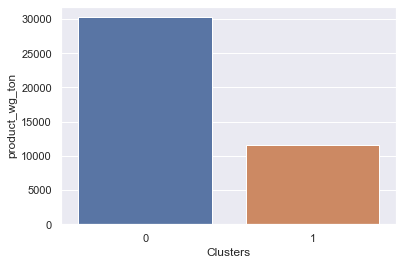

In [195]:
sns.barplot(df1['Clusters'],df1['product_wg_ton']);

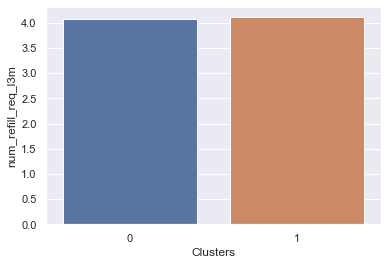

In [196]:
sns.barplot(df1['Clusters'],df1['num_refill_req_l3m']);

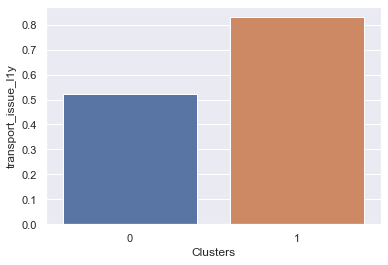

In [197]:
sns.barplot(df1['Clusters'],df1['transport_issue_l1y']);

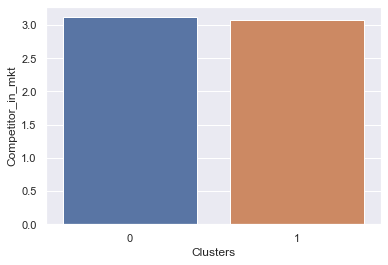

In [198]:
sns.barplot(df1['Clusters'],df1['Competitor_in_mkt']);

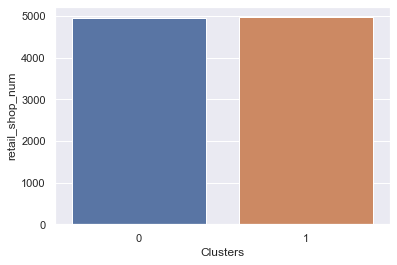

In [199]:
sns.barplot(df1['Clusters'],df1['retail_shop_num']);

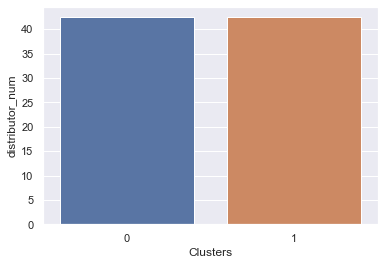

In [200]:
sns.barplot(df1['Clusters'],df1['distributor_num']);

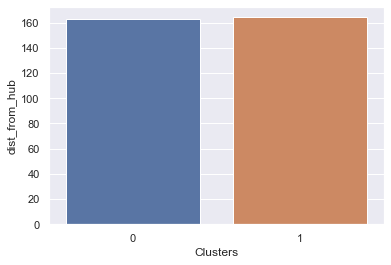

In [201]:
sns.barplot(df1['Clusters'],df1['dist_from_hub']);

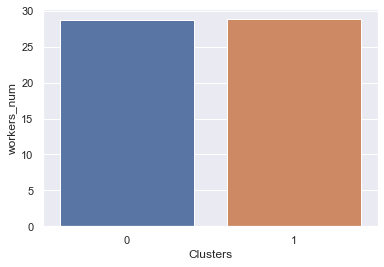

In [202]:
sns.barplot(df1['Clusters'],df1['workers_num']);

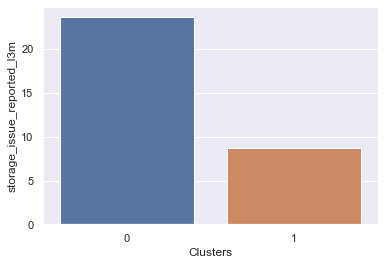

In [203]:
sns.barplot(df1['Clusters'],df1['storage_issue_reported_l3m']);

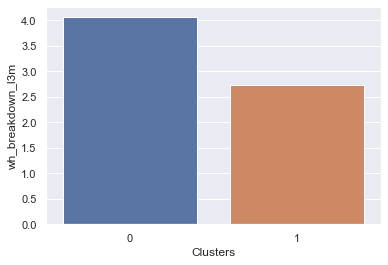

In [204]:
sns.barplot(df1['Clusters'],df1['wh_breakdown_l3m']);

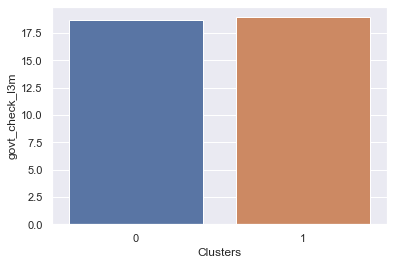

In [205]:
sns.barplot(df1['Clusters'],df1['govt_check_l3m']);

In [206]:
data_new.columns

Index(['WH_capacity_size', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'distributor_num',
       'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub',
       'workers_num', 'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton', 'wh_age_years', 'Location_type_Urban', 'zone_North',
       'zone_South', 'zone_West', 'WH_regional_zone_Zone 2',
       'WH_regional_zone_Zone 3', 'WH_regional_zone_Zone 4',
       'WH_regional_zone_Zone 5', 'WH_regional_zone_Zone 6',
       'wh_owner_type_Rented', 'Clus_kmeans2'],
      dtype='object')

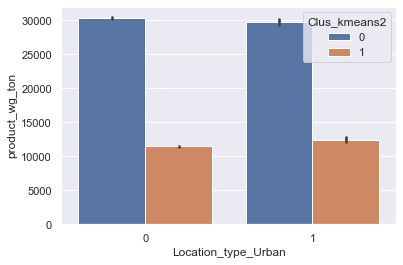

In [207]:
sns.barplot(data_new['Location_type_Urban'],data_new['product_wg_ton'],hue=data_new['Clus_kmeans2']);

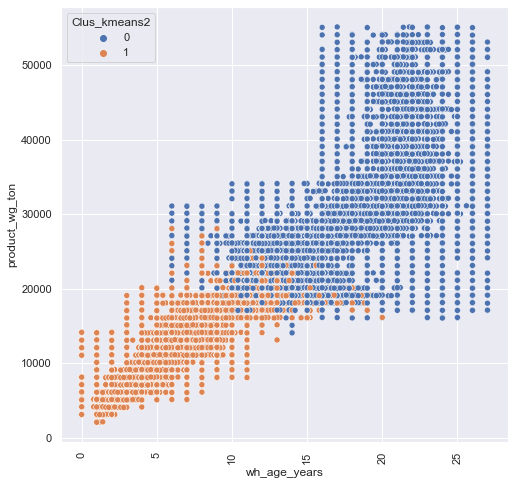

In [208]:
plt.figure(figsize=(8,8))
sns.scatterplot(data['wh_age_years'],data['product_wg_ton'],hue=data['Clus_kmeans2']);
plt.xticks(rotation=90);

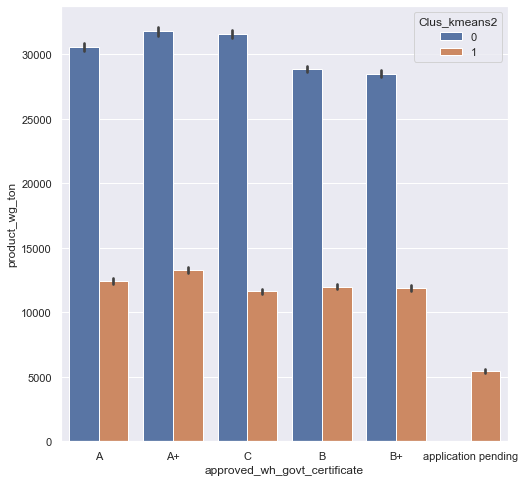

In [209]:
plt.figure(figsize=(8,8))
sns.barplot(data['approved_wh_govt_certificate'],data['product_wg_ton'],hue=data['Clus_kmeans2']);

## Make 4 models using ANN, Decision Tree, Random Forest, and Linear Regression

### Check Train and Test RMSE
### Check Train and Test Scores

In [210]:
def percentage_error(actual,predicted):
    res =np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j]!=0:
            res[j]=(actual[j]-predicted[j])/actual[j]
        else:
            res[j] = predicted[j]/np.mean(actual)
    return res
def mape(y_true, y_pred):
    return np.mean(np.abs(percentage_error(np.asarray(y_true),np.asarray(y_pred))))*100

In [211]:
annr = MLPRegressor(hidden_layer_sizes=(500),random_state=123, max_iter=1000)#you are free to tweak the layer sizes
rfr = RandomForestRegressor(random_state=123)
dtr = tree.DecisionTreeRegressor(random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != annr) :
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
        mape_train.append(mape(y_train,i.predict(x_train)))
        mape_test.append(mape(y_test,i.predict(x_test)))
 
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        mape_train.append(mape(y_train,i.predict(x_train_scaled)))
        mape_test.append(mape(y_test,i.predict(x_test_scaled)))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test,'Taining MAPE': mape_train,'Test MAPE' : mape_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                          Train RMSE    Test RMSE  Training Score  Test Score  \
Linear Regression        1740.109149  1785.863193        0.977554    0.976260   
Decision Tree Regressor     0.000000  1246.510526        1.000000    0.988434   
Random Forest Regressor   342.359726   918.313279        0.999131    0.993723   
ANN Regressor             983.515145  1105.519307        0.992830    0.990902   

                         Taining MAPE  Test MAPE  
Linear Regression            8.901757   9.119440  
Decision Tree Regressor      0.000000   5.013337  
Random Forest Regressor      1.542264   4.104171  
ANN Regressor                4.758988   5.369675  


In [212]:
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [15,30,35,40,50],
}

dtr=tree.DecisionTreeRegressor(random_state=123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(x_train,y_train)

print(grid_search.best_params_)

{'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 40}


In [213]:
param_grid = {
    'max_depth': [25,20],
    'max_features': [15,12],
    'min_samples_leaf': [2,3],
    'min_samples_split': [6,7],
    'n_estimators': [450,400]
}

rfr = RandomForestRegressor(random_state=123)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

In [214]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [25, 20], 'max_features': [15, 12],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [6, 7],
                         'n_estimators': [450, 400]})

In [215]:
print(grid_search.best_params_)

{'max_depth': 20, 'max_features': 15, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 450}


In [216]:
param_grid = {
    'hidden_layer_sizes':[400,300], 
    # keeping these simple because it would take too much time to run on low-end computers
    "activation": ["tanh", "relu"], 
    "solver": ["sgd", "adam"]}

annr = MLPRegressor(max_iter=1000, random_state=123)

grid_search = GridSearchCV(estimator = annr, param_grid = param_grid, cv = 2)

In [217]:
grid_search.fit(x_train_scaled,y_train)

GridSearchCV(cv=2, estimator=MLPRegressor(max_iter=1000, random_state=123),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [400, 300],
                         'solver': ['sgd', 'adam']})

In [218]:
print(grid_search.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': 400, 'solver': 'adam'}


In [219]:
annr  = MLPRegressor(activation='relu', hidden_layer_sizes=(300), 
                    solver='adam',random_state=123, 
                    max_iter=1000)
rfr = RandomForestRegressor(max_depth=20, max_features=12, 
                            min_samples_leaf= 2,
                            min_samples_split= 7, n_estimators= 400,
                            random_state=123)
dtr = tree.DecisionTreeRegressor(max_depth=10,min_samples_split=40,min_samples_leaf=3,random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier 
   if (i != annr):
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
        mape_train.append(mape(y_train,i.predict(x_train)))
        mape_test.append(mape(y_test,i.predict(x_test)))

   else:
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        mape_train.append(mape(y_train,i.predict(x_train_scaled)))
        mape_test.append(mape(y_test,i.predict(x_test_scaled)))

        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test,'Taining MAPE': mape_train,'Test MAPE' : mape_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                          Train RMSE    Test RMSE  Training Score  Test Score  \
Linear Regression        1740.109149  1785.863193        0.977554    0.976260   
Decision Tree Regressor   835.815957   940.614187        0.994822    0.993414   
Random Forest Regressor   532.577560   920.842951        0.997897    0.993688   
ANN Regressor            1043.858982  1144.487509        0.991923    0.990250   

                         Taining MAPE  Test MAPE  
Linear Regression            8.901757   9.119440  
Decision Tree Regressor      3.718245   4.179332  
Random Forest Regressor      2.407422   4.151417  
ANN Regressor                5.138446   5.638679  


Text(0.5, 0, 'Decision Tree Feature Importance')

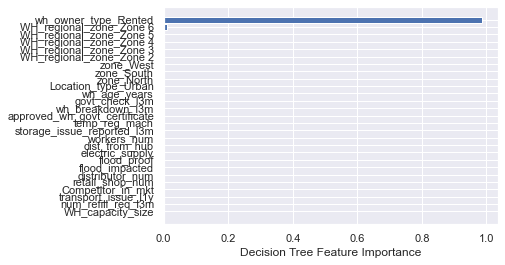

In [220]:
sorted_idx = dtr.feature_importances_.argsort()
plt.barh(x_train.columns,dtr.feature_importances_[sorted_idx])
plt.xlabel("Decision Tree Feature Importance")

In [221]:
pred = dtr.predict(x_test)

<AxesSubplot:xlabel='product_wg_ton'>

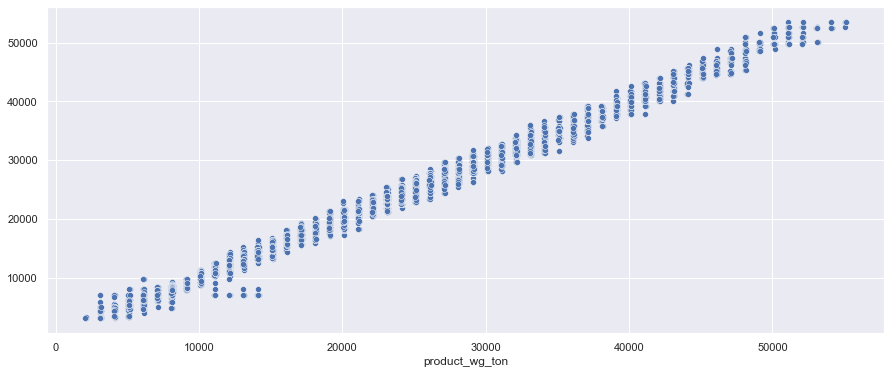

In [222]:
plt.figure(figsize = (15,6))
sns.scatterplot(y_test,pred)

Text(0.5, 0, 'Random Forest Feature Importance')

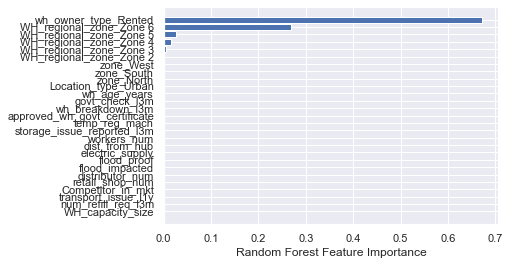

In [223]:
sorted_idx = rfr.feature_importances_.argsort()
plt.barh(x_train.columns,rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

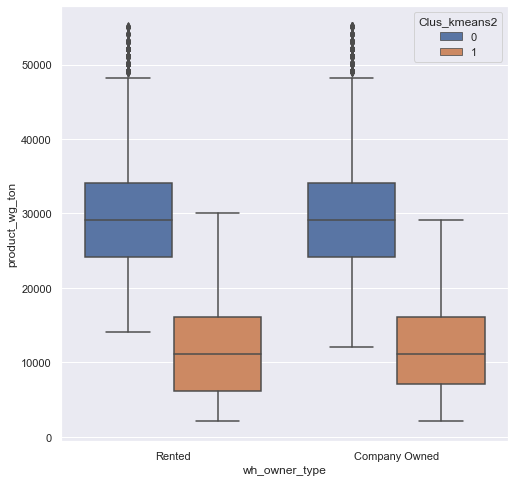

In [224]:
plt.figure(figsize=(8,8))
sns.boxplot(data['wh_owner_type'],data['product_wg_ton'],hue=data['Clus_kmeans2']);

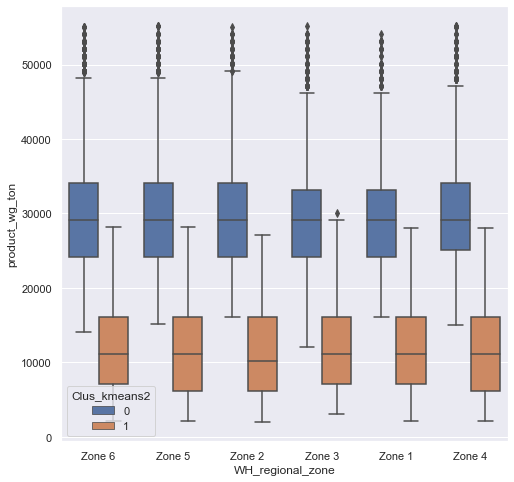

In [225]:
plt.figure(figsize=(8,8))
sns.boxplot(data['WH_regional_zone'],data['product_wg_ton'],hue=data['Clus_kmeans2']);

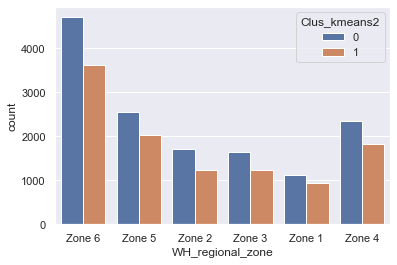

In [226]:
sns.countplot(data['WH_regional_zone'],hue=data['Clus_kmeans2']);

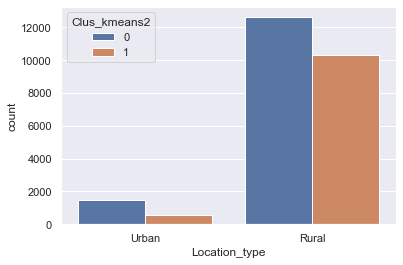

In [227]:
sns.countplot(data['Location_type'],hue=data['Clus_kmeans2']);

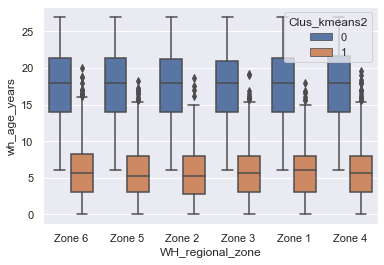

In [228]:
sns.boxplot(data['WH_regional_zone'],data['wh_age_years'],hue=data['Clus_kmeans2']);

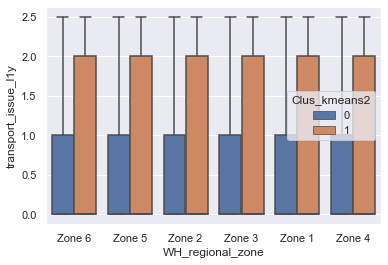

In [229]:
sns.boxplot(data['WH_regional_zone'],data['transport_issue_l1y'],hue=data['Clus_kmeans2']);

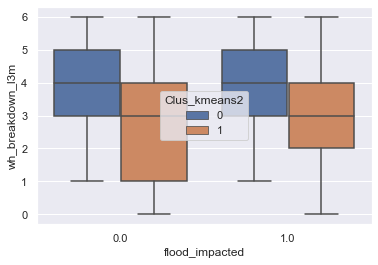

In [230]:
sns.boxplot(data['flood_impacted'],data['wh_breakdown_l3m'],hue=data['Clus_kmeans2']);

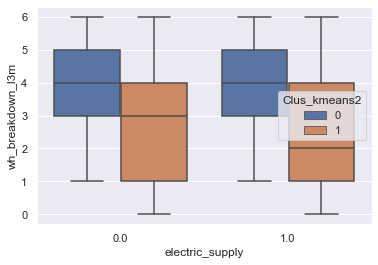

In [231]:
sns.boxplot(data['electric_supply'],data['wh_breakdown_l3m'],hue=data['Clus_kmeans2']);

#New plots

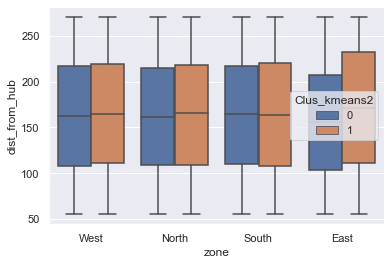

In [232]:
sns.boxplot(data['zone'],data['dist_from_hub'],hue=data['Clus_kmeans2']);

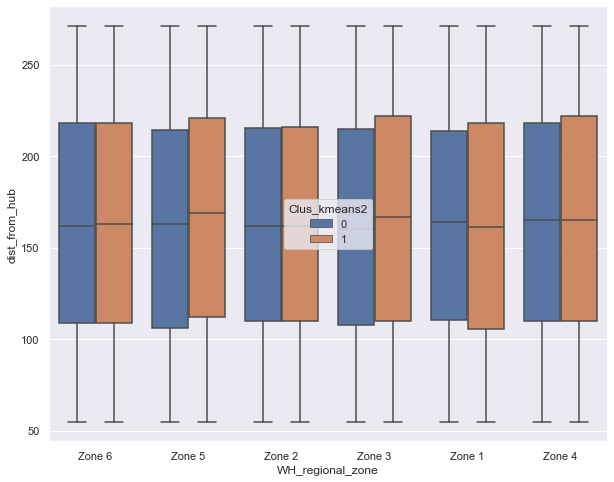

In [233]:
plt.figure(figsize=(10,8))
sns.boxplot(data['WH_regional_zone'],data['dist_from_hub'],hue=data['Clus_kmeans2']);

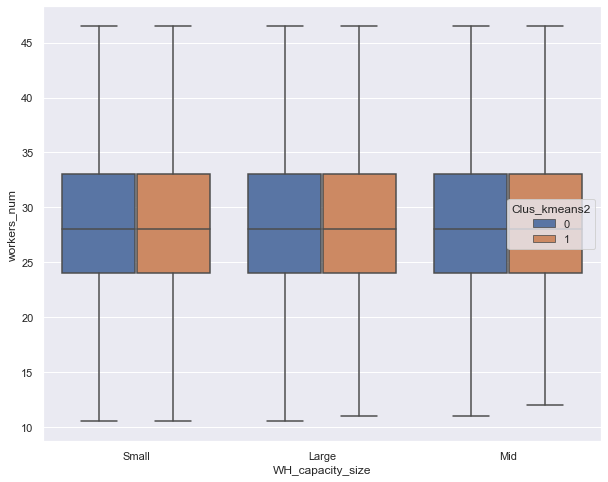

In [234]:
plt.figure(figsize=(10,8))
sns.boxplot(data['WH_capacity_size'],data['workers_num'],hue=data['Clus_kmeans2']);

<AxesSubplot:xlabel='flood_impacted', ylabel='count'>

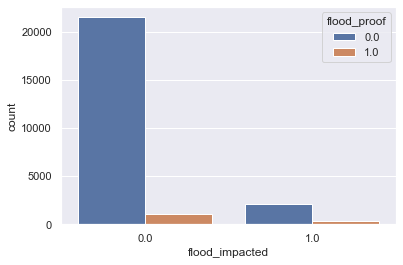

In [235]:
sns.countplot(data['flood_impacted'],hue=data['flood_proof'])

In [236]:
pd.crosstab(data['flood_impacted'],columns=data['flood_proof'],margins=True)

flood_proof       0.0   1.0    All
flood_impacted                    
0.0             21495  1051  22546
1.0              2139   315   2454
All             23634  1366  25000

In [237]:
pd.crosstab(data['flood_impacted'],columns=data['flood_proof'],normalize=True,margins=True)

flood_proof         0.0      1.0      All
flood_impacted                           
0.0             0.85980  0.04204  0.90184
1.0             0.08556  0.01260  0.09816
All             0.94536  0.05464  1.00000

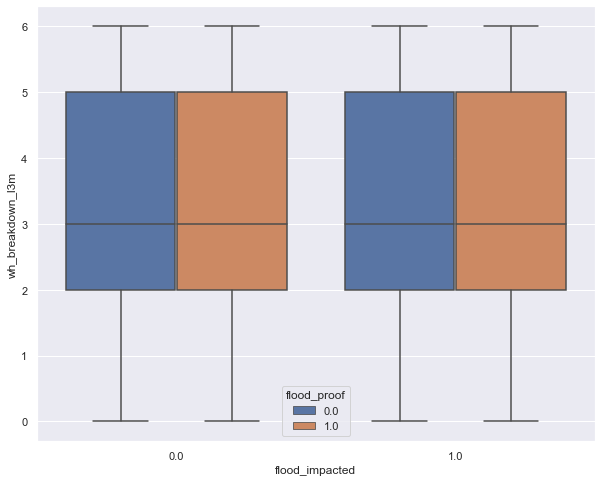

In [238]:
plt.figure(figsize=(10,8))
sns.boxplot(data['flood_impacted'],data['wh_breakdown_l3m'],hue=data['flood_proof']);

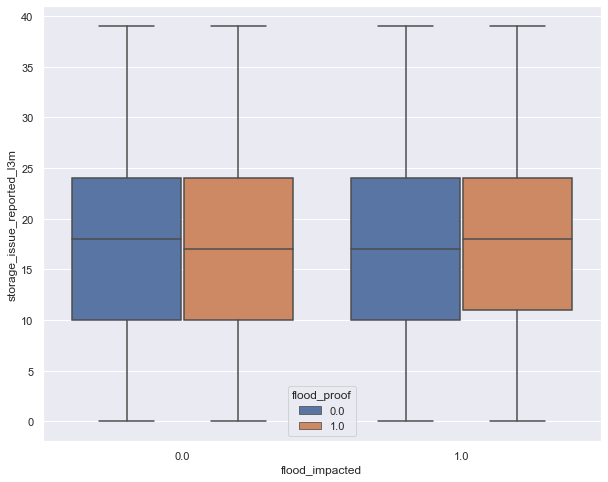

In [239]:
plt.figure(figsize=(10,8))
sns.boxplot(data['flood_impacted'],data['storage_issue_reported_l3m'],hue=data['flood_proof']);

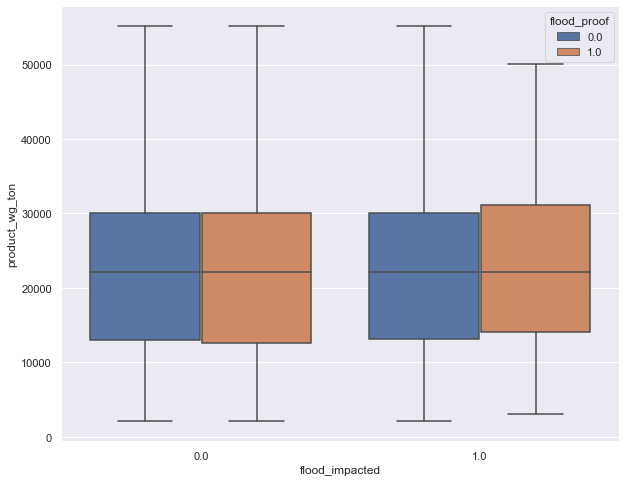

In [240]:
plt.figure(figsize=(10,8))
sns.boxplot(data['flood_impacted'],data['product_wg_ton'],hue=data['flood_proof']);

<AxesSubplot:xlabel='electric_supply', ylabel='count'>

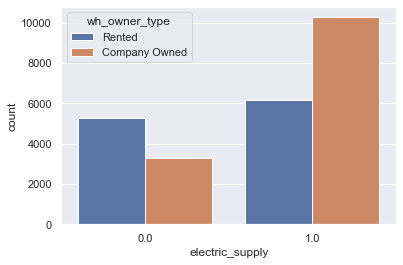

In [241]:
sns.countplot(data['electric_supply'],hue=data['wh_owner_type'])

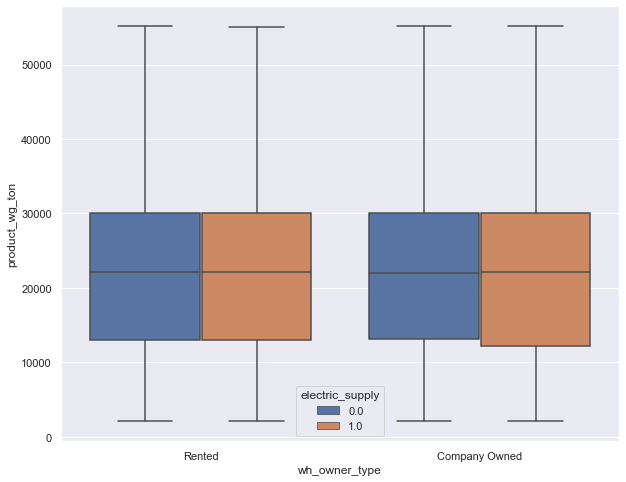

In [242]:
plt.figure(figsize=(10,8))
sns.boxplot(data['wh_owner_type'],data['product_wg_ton'],hue=data['electric_supply']);

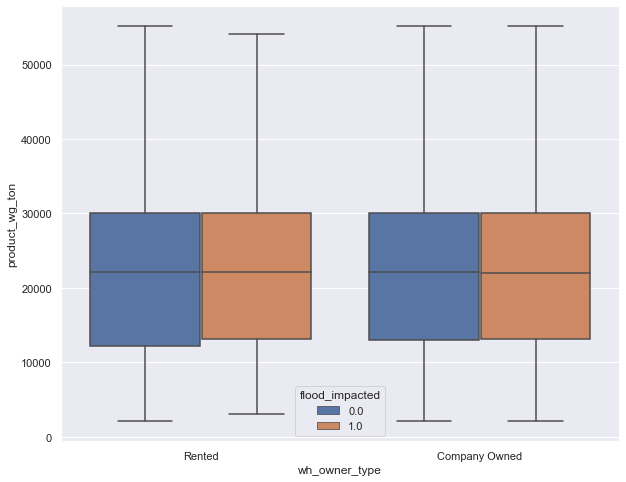

In [243]:
plt.figure(figsize=(10,8))
sns.boxplot(data['wh_owner_type'],data['product_wg_ton'],hue=data['flood_impacted']);

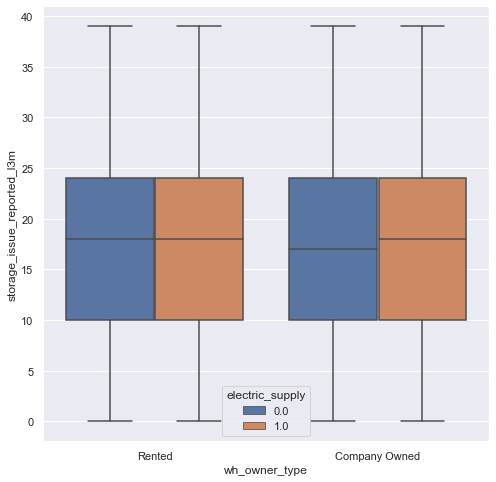

In [244]:
plt.figure(figsize=(8,8))
sns.boxplot(data['wh_owner_type'],data['storage_issue_reported_l3m'],hue=data['electric_supply']);

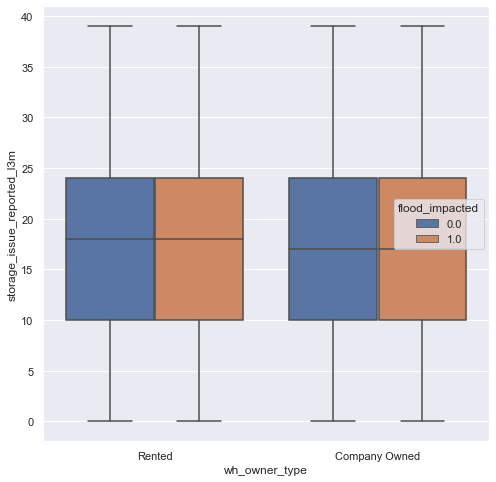

In [245]:
plt.figure(figsize=(8,8))
sns.boxplot(data['wh_owner_type'],data['storage_issue_reported_l3m'],hue=data['flood_impacted']);

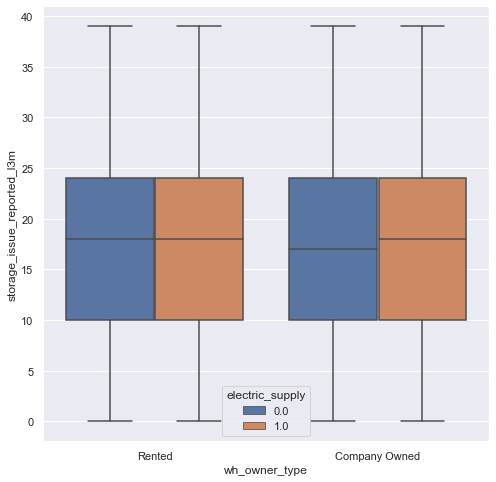

In [246]:
plt.figure(figsize=(8,8))
sns.boxplot(data['wh_owner_type'],data['storage_issue_reported_l3m'],hue=data['electric_supply']);

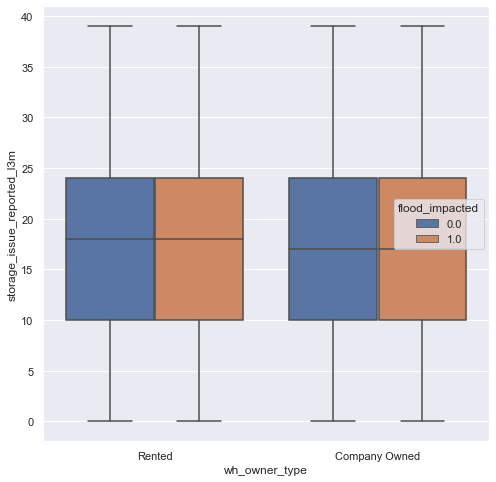

In [247]:
plt.figure(figsize=(8,8))
sns.boxplot(data['wh_owner_type'],data['storage_issue_reported_l3m'],hue=data['flood_impacted']);

<AxesSubplot:xlabel='transport_issue_l1y', ylabel='dist_from_hub'>

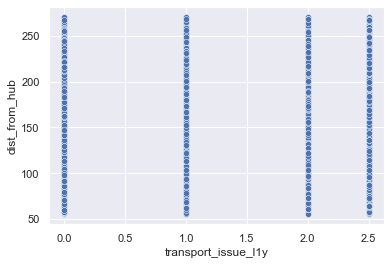

In [248]:
sns.scatterplot(data['transport_issue_l1y'],data['dist_from_hub'])

<AxesSubplot:xlabel='WH_regional_zone', ylabel='transport_issue_l1y'>

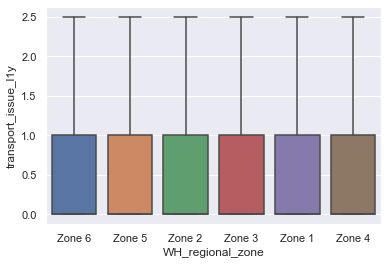

In [249]:
sns.boxplot(data['WH_regional_zone'],data['transport_issue_l1y'])

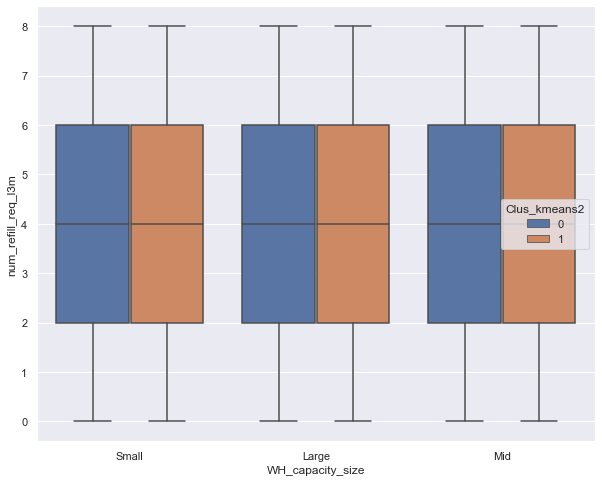

In [250]:
plt.figure(figsize=(10,8))
sns.boxplot(data['WH_capacity_size'],data['num_refill_req_l3m'],hue=data['Clus_kmeans2']);

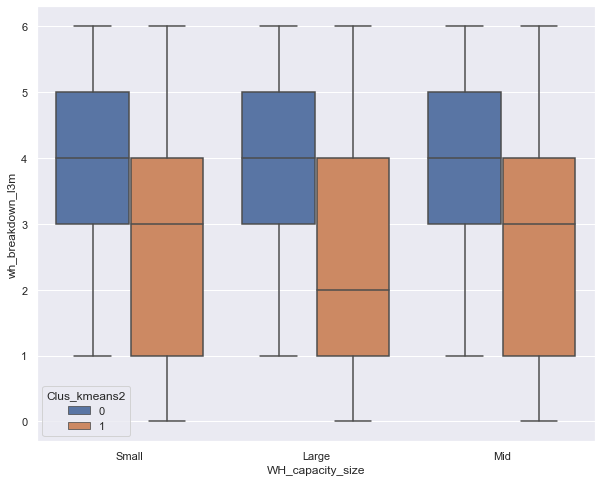

In [251]:
plt.figure(figsize=(10,8))
sns.boxplot(data['WH_capacity_size'],data['wh_breakdown_l3m'],hue=data['Clus_kmeans2']);

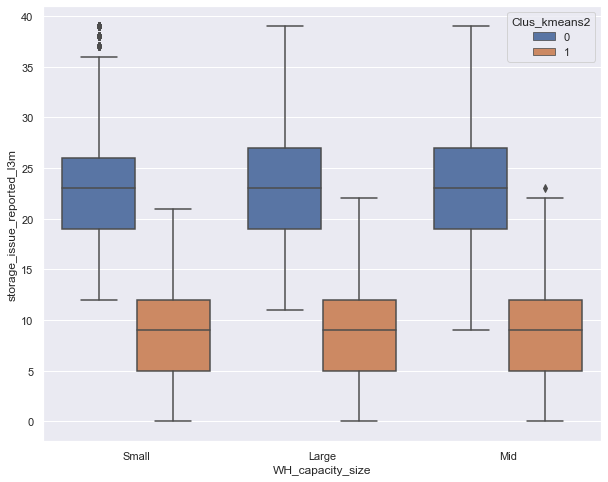

In [252]:
plt.figure(figsize=(10,8))
sns.boxplot(data['WH_capacity_size'],data['storage_issue_reported_l3m'],hue=data['Clus_kmeans2']);

<AxesSubplot:xlabel='WH_regional_zone', ylabel='count'>

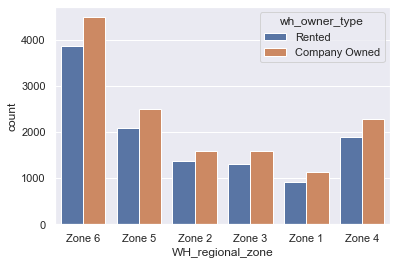

In [253]:
sns.countplot(data['WH_regional_zone'],hue=data['wh_owner_type'])

In [254]:
pd.pivot_table(data[data.zone=='North'],['product_wg_ton','num_refill_req_l3m', 'transport_issue_l1y','storage_issue_reported_l3m','wh_breakdown_l3m'],index=[data.WH_regional_zone],
columns=data['Clus_kmeans2'], aggfunc=sum)

num_refill_req_l3m         product_wg_ton              \
Clus_kmeans2                      0       1              0           1   
WH_regional_zone                                                         
Zone 1                       1821.0  1508.0     14022598.0   4443533.0   
Zone 2                       1982.0  1413.0     14760500.0   4205832.0   
Zone 3                       2193.0  1735.0     16587375.0   4748360.0   
Zone 4                       2673.0  2153.0     20348654.0   5905865.0   
Zone 5                       4452.0  3449.0     33276561.0   9616554.0   
Zone 6                      10457.0  7978.0     77483018.0  22766973.0   

                 storage_issue_reported_l3m          transport_issue_l1y  \
Clus_kmeans2                              0        1                   0   
WH_regional_zone                                                           
Zone 1                              10972.0   3358.0               249.5   
Zone 2                              11516.0   3132.0               259.5   
Zone 3                              12974.0   3608.0               301.5   
Zone 4                              15952.0   4425.0               365.0   
Zone 5                              25957.0   7252.0               602.5   
Zone 6                              60449.0  17165.0              1317.0   

                         wh_breakdown_l3m          
Clus_kmeans2           1                0       1  
WH_regional_zone                                   
Zone 1             333.5           1874.0  1051.0  
Zone 2             270.0           1997.0   953.0  
Zone 3             317.0           2288.0  1116.0  
Zone 4             457.0           2691.0  1344.0  
Zone 5             713.0           4444.0  2238.0  
Zone 6            1633.0          10238.0  5377.0

In [255]:
pd.pivot_table(data[data.zone=='South'],['product_wg_ton','num_refill_req_l3m', 'transport_issue_l1y','storage_issue_reported_l3m','wh_breakdown_l3m'],index=[data.WH_regional_zone],
                     columns=data['Clus_kmeans2'], aggfunc=sum)

num_refill_req_l3m         product_wg_ton             \
Clus_kmeans2                      0       1              0          1   
WH_regional_zone                                                        
Zone 1                       1362.0  1298.0     10890973.0  3791893.0   
Zone 2                       3465.0  2467.0     25607555.0  6860344.0   
Zone 3                       1884.0  1768.0     14022234.0  4787885.0   
Zone 4                       1973.0  1651.0     14665843.0  4564827.0   
Zone 5                       2457.0  2039.0     18270722.0  5842975.0   
Zone 6                       3103.0  2460.0     23089734.0  7145916.0   

                 storage_issue_reported_l3m         transport_issue_l1y  \
Clus_kmeans2                              0       1                   0   
WH_regional_zone                                                          
Zone 1                               8537.0  2791.0               200.0   
Zone 2                              19972.0  5196.0               417.0   
Zone 3                              10960.0  3591.0               247.0   
Zone 4                              11501.0  3461.0               264.5   
Zone 5                              14293.0  4445.0               303.5   
Zone 6                              18034.0  5385.0               408.5   

                        wh_breakdown_l3m          
Clus_kmeans2          1                0       1  
WH_regional_zone                                  
Zone 1            262.5           1484.0   849.0  
Zone 2            482.0           3462.0  1597.0  
Zone 3            362.0           1886.0  1145.0  
Zone 4            324.5           1979.0  1084.0  
Zone 5            359.5           2483.0  1390.0  
Zone 6            528.0           3089.0  1607.0

In [256]:
pd.pivot_table(data[data.zone=='East'],['product_wg_ton','num_refill_req_l3m', 'transport_issue_l1y','storage_issue_reported_l3m','wh_breakdown_l3m'],index=[data.WH_regional_zone],
                     columns=data['Clus_kmeans2'], aggfunc=sum)

num_refill_req_l3m        product_wg_ton            \
Clus_kmeans2                      0      1              0         1   
WH_regional_zone                                                      
Zone 1                         92.0   77.0       623285.0  249053.0   
Zone 3                        285.0  165.0      2019791.0  506893.0   
Zone 4                        342.0  246.0      2594436.0  711735.0   
Zone 5                        165.0  115.0      1416385.0  351689.0   
Zone 6                        146.0  114.0      1008628.0  265608.0   

                 storage_issue_reported_l3m        transport_issue_l1y        \
Clus_kmeans2                              0      1                   0     1   
WH_regional_zone                                                               
Zone 1                                491.0  195.0                12.5  16.5   
Zone 3                               1571.0  391.0                31.0  42.5   
Zone 4                               2016.0  550.0                40.0  62.5   
Zone 5                               1105.0  270.0                19.5  26.5   
Zone 6                                795.0  210.0                20.5  18.0   

                 wh_breakdown_l3m         
Clus_kmeans2                    0      1  
WH_regional_zone                          
Zone 1                       96.0   52.0  
Zone 3                      268.0  139.0  
Zone 4                      312.0  185.0  
Zone 5                      169.0   99.0  
Zone 6                      135.0   60.0

In [257]:
pd.pivot_table(data[data.zone=='West'],['product_wg_ton','num_refill_req_l3m', 'transport_issue_l1y','storage_issue_reported_l3m','wh_breakdown_l3m'],index=[data.WH_regional_zone],
                     columns=data['Clus_kmeans2'], aggfunc=sum)

num_refill_req_l3m         product_wg_ton              \
Clus_kmeans2                      0       1              0           1   
WH_regional_zone                                                         
Zone 1                       1085.0   879.0      8141270.0   2496927.0   
Zone 2                       1641.0  1113.0     12260539.0   2885998.0   
Zone 3                       2341.0  1531.0     16451602.0   4166090.0   
Zone 4                       4631.0  3565.0     34025625.0   9779044.0   
Zone 5                       3290.0  2764.0     24821238.0   7421489.0   
Zone 6                       5618.0  4280.0     40638822.0  12022952.0   

                 storage_issue_reported_l3m         transport_issue_l1y  \
Clus_kmeans2                              0       1                   0   
WH_regional_zone                                                          
Zone 1                               6341.0  1870.0               122.0   
Zone 2                               9548.0  2153.0               177.5   
Zone 3                              12852.0  3158.0               263.5   
Zone 4                              26541.0  7413.0               568.5   
Zone 5                              19359.0  5571.0               436.5   
Zone 6                              31809.0  9126.0               732.5   

                        wh_breakdown_l3m          
Clus_kmeans2          1                0       1  
WH_regional_zone                                  
Zone 1            194.5           1104.0   596.0  
Zone 2            234.5           1548.0   731.0  
Zone 3            338.5           2235.0  1060.0  
Zone 4            714.0           4597.0  2422.0  
Zone 5            534.5           3371.0  1814.0  
Zone 6            814.0           5496.0  2896.0